# 第9章 绘图和可视化 Plotting and Visualization

信息可视化（也叫绘图）是数据分析中最重要的⼯作之⼀。它可
能是探索过程的⼀部分，例如，帮助我们找出异常值、必要的数
据转换、得出有关模型的idea等。另外，做⼀个可交互的数据可
视化也许是⼯作的最终⽬标。 Python有许多库进⾏静态或动态的
数据可视化，但我这⾥重要关注于
matplotlib（http://matplotlib.org/）和基于它的库。
matplotlib是⼀个⽤于创建出版质量图表的桌⾯绘图包（主要是
2D⽅⾯）。该项⽬是由John Hunter于2002年启动的，其⽬的是
为Python构建⼀个MATLAB式的绘图接⼝。 matplotlib和IPython
社区进⾏合作，简化了从IPython shell（包括现在的Jupyter
notebook）进⾏交互式绘图。 matplotlib⽀持各种操作系统上许
多不同的GUI后端，⽽且还能将图⽚导出为各种常⻅的⽮量
（vector）和光栅（raster）图： PDF、 SVG、 JPG、 PNG、
BMP、 GIF等。除了⼏张，本书中的⼤部分图都是⽤它⽣成的。
随着时间的发展， matplotlib衍⽣出了多个数据可视化的⼯具
集，它们使⽤matplotlib作为底层。其中之⼀是
seaborn（http://seaborn.pydata.org/），本章后⾯会学习它。
学习本章代码案例的最简单⽅法是在Jupyter notebook进⾏交互
式绘图。在Jupyter notebook中执⾏下⾯的语句：

In [18]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [19]:
%matplotlib notebook

##   9.1 matplotlib API入门 A Brief matplotlib API Primer

* matplotlib的通常引⼊约定是：

In [20]:
import matplotlib.pyplot as plt

在Jupyter中运⾏%matplotlib notebook（或在IPython中运
⾏%matplotlib），就可以创建⼀个简单的图形。如果⼀切设置正
确，

<IPython.core.display.Javascript object>


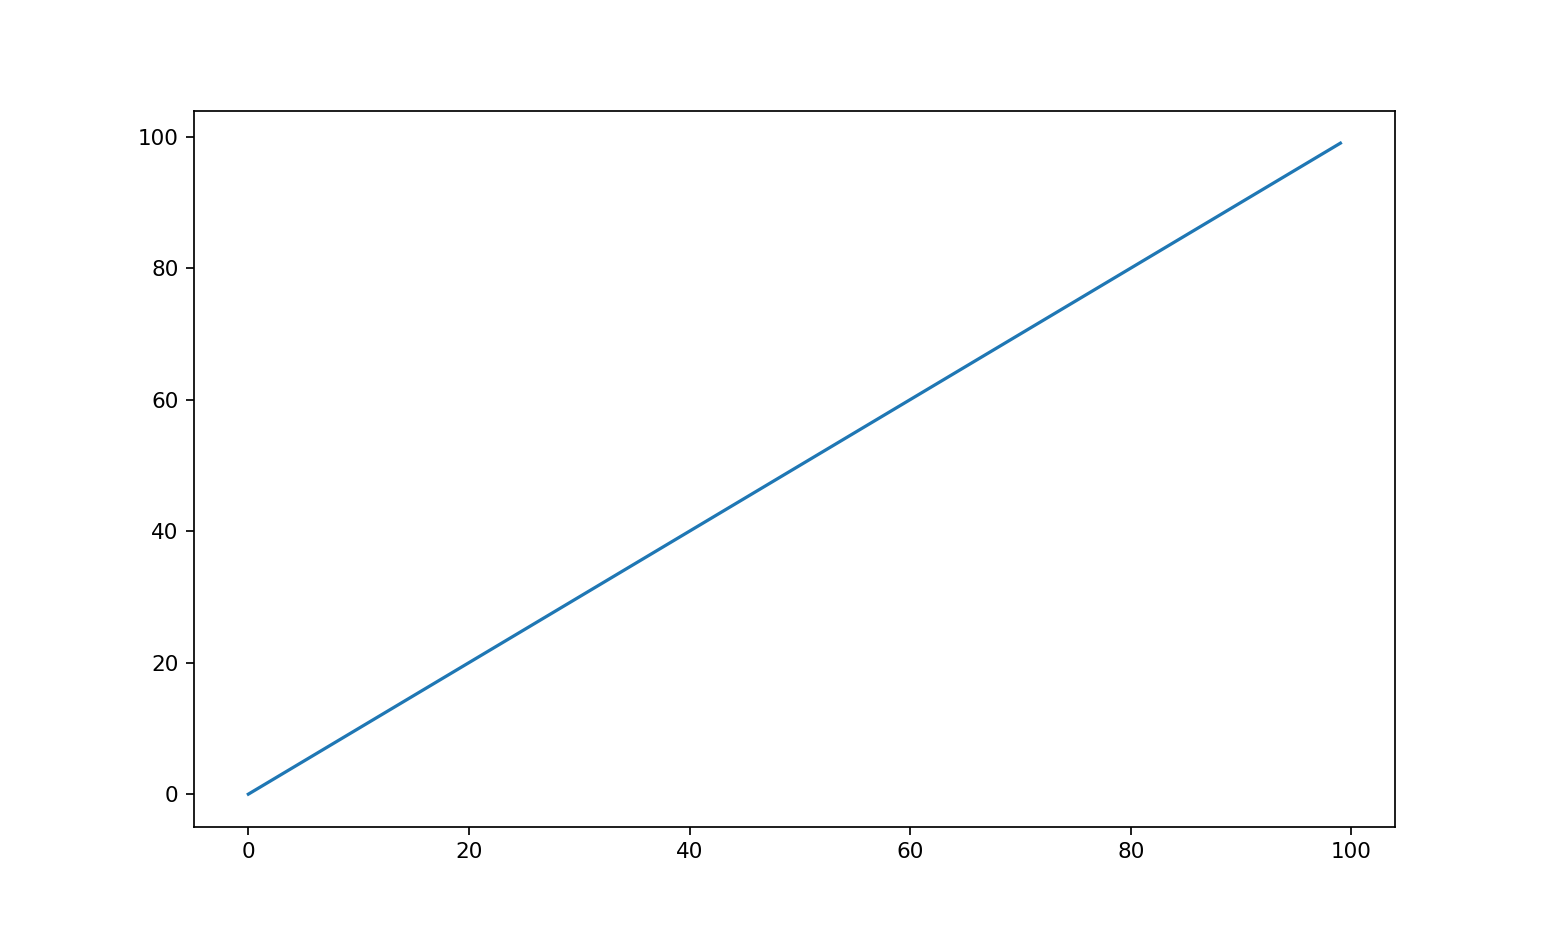

In [22]:
import numpy as np
data = np.arange(100)
data
plt.plot(data)

虽然seaborn这样的库和pandas的内置绘图函数能够处理许多普
通的绘图任务，但如果需要⾃定义⼀些⾼级功能的话就必须学习
matplotlib API。

虽然本书没有详细地讨论matplotlib的各种功能，但⾜
以将你引⼊⻔。 matplotlib的示例库和⽂档是学习⾼级特性的
最好资源。

### Figure和Subplot  Figures and Subplots

* matplotlib的图像都位于Figure对象中。你可以⽤plt.figure创建⼀
个新的Figure：

<IPython.core.display.Javascript object>


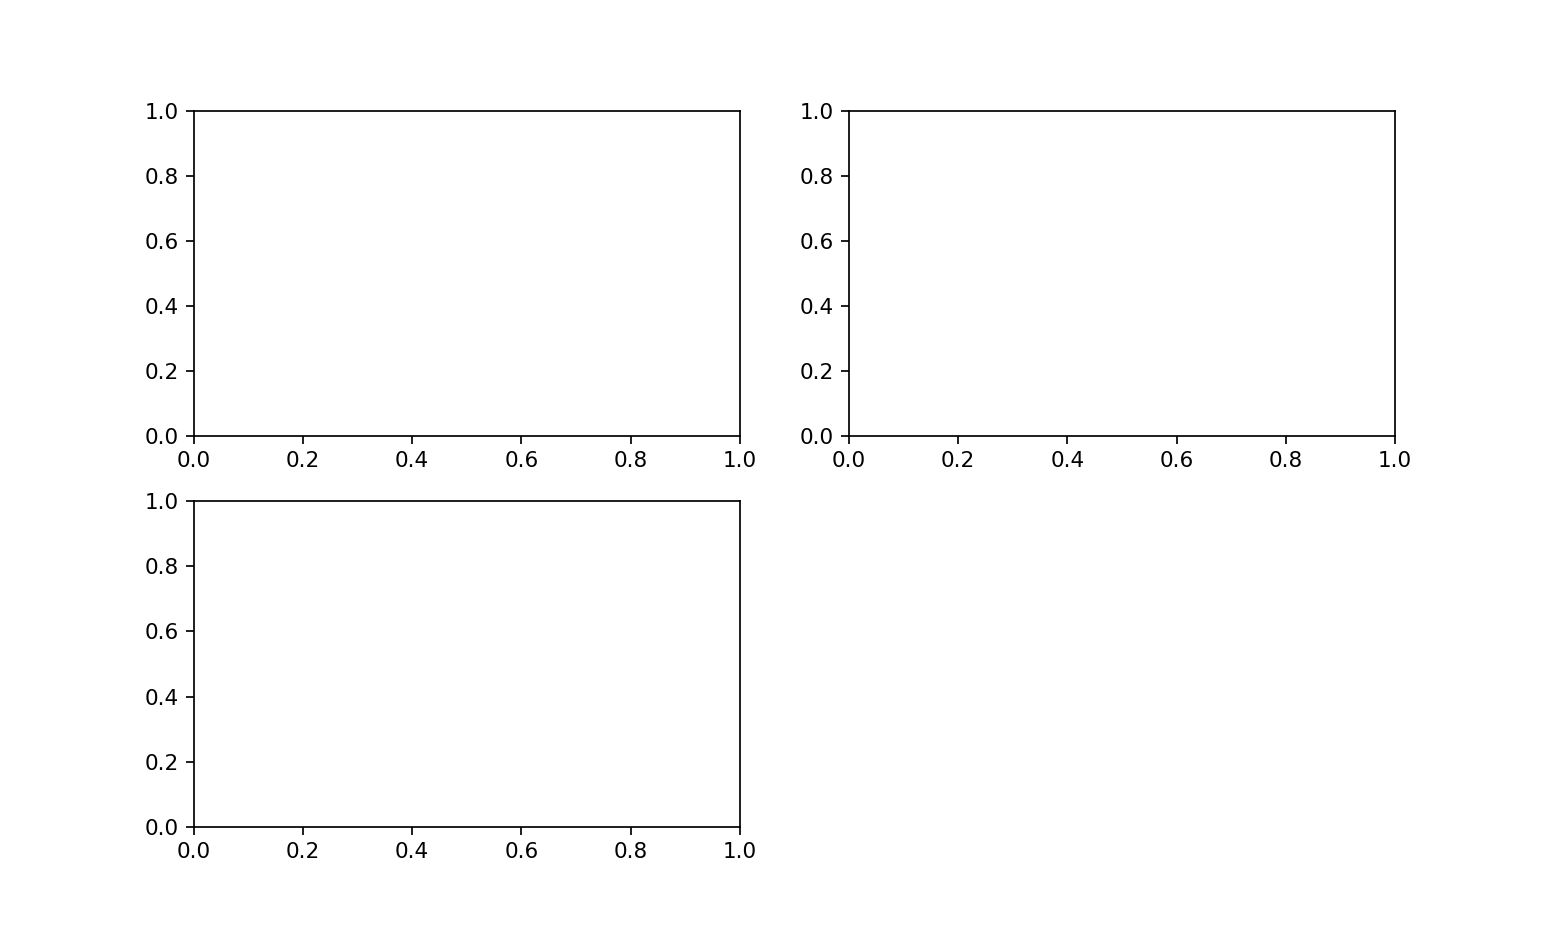

In [24]:
fig = plt.figure()

* 如果⽤的是IPython，这时会弹出⼀个空窗⼝，但在Jupyter中，
必须再输⼊更多命令才能看到。 plt.figure有⼀些选项，特别是
figsize，它⽤于确保当图⽚保存到磁盘时具有⼀定的⼤⼩和纵横
⽐。

* 不能通过空Figure绘图。必须⽤add_subplot创建⼀个或多个
subplot才⾏：

In [25]:
ax1 = fig.add_subplot(2, 2, 1)

这条代码的意思是：图像应该是2×2的（即最多4张图），且当前
选中的是4个subplot中的第⼀个（编号从1开始）。如果再把后
⾯两个subplot也创建出来，最终得到的图像如图9-2所示：

In [26]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


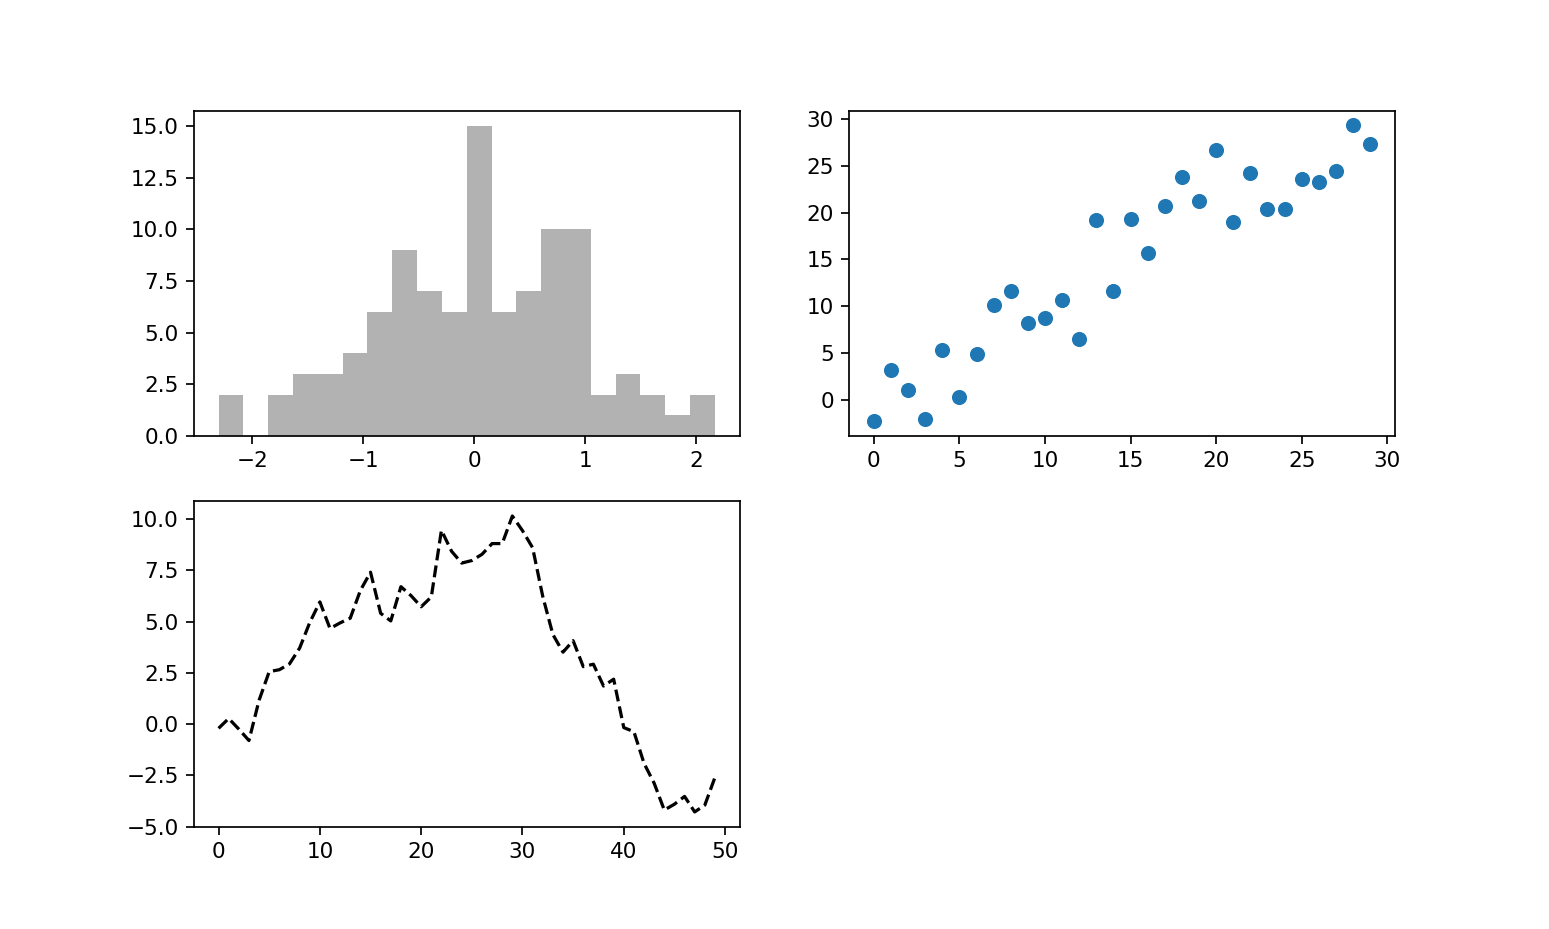

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

* 如果这时执⾏⼀条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），
matplotlib就会在最后⼀个⽤过的subplot（如果没有则创建⼀
个）上进⾏绘制，隐藏创建figure和subplot的过程。因此，如果
我们执⾏下列命令，你就会得到如图9-3所示的结果：

In [29]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

"k--"是⼀个线型选项，⽤于告诉matplotlib绘制⿊⾊虚线图。上⾯
那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接
调⽤它们的实例⽅法就可以在其它空着的格⼦⾥⾯画图了

In [33]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [34]:
plt.close('all')

你可以在matplotlib的⽂档中找到各种图表类型。
创建包含subplot⽹格的figure是⼀个⾮常常⻅的任务， matplotlib
有⼀个更为⽅便的⽅法plt.subplots，它可以创建⼀个新的
Figure，并返回⼀个含有已创建的subplot对象的NumPy数组：

<IPython.core.display.Javascript object>


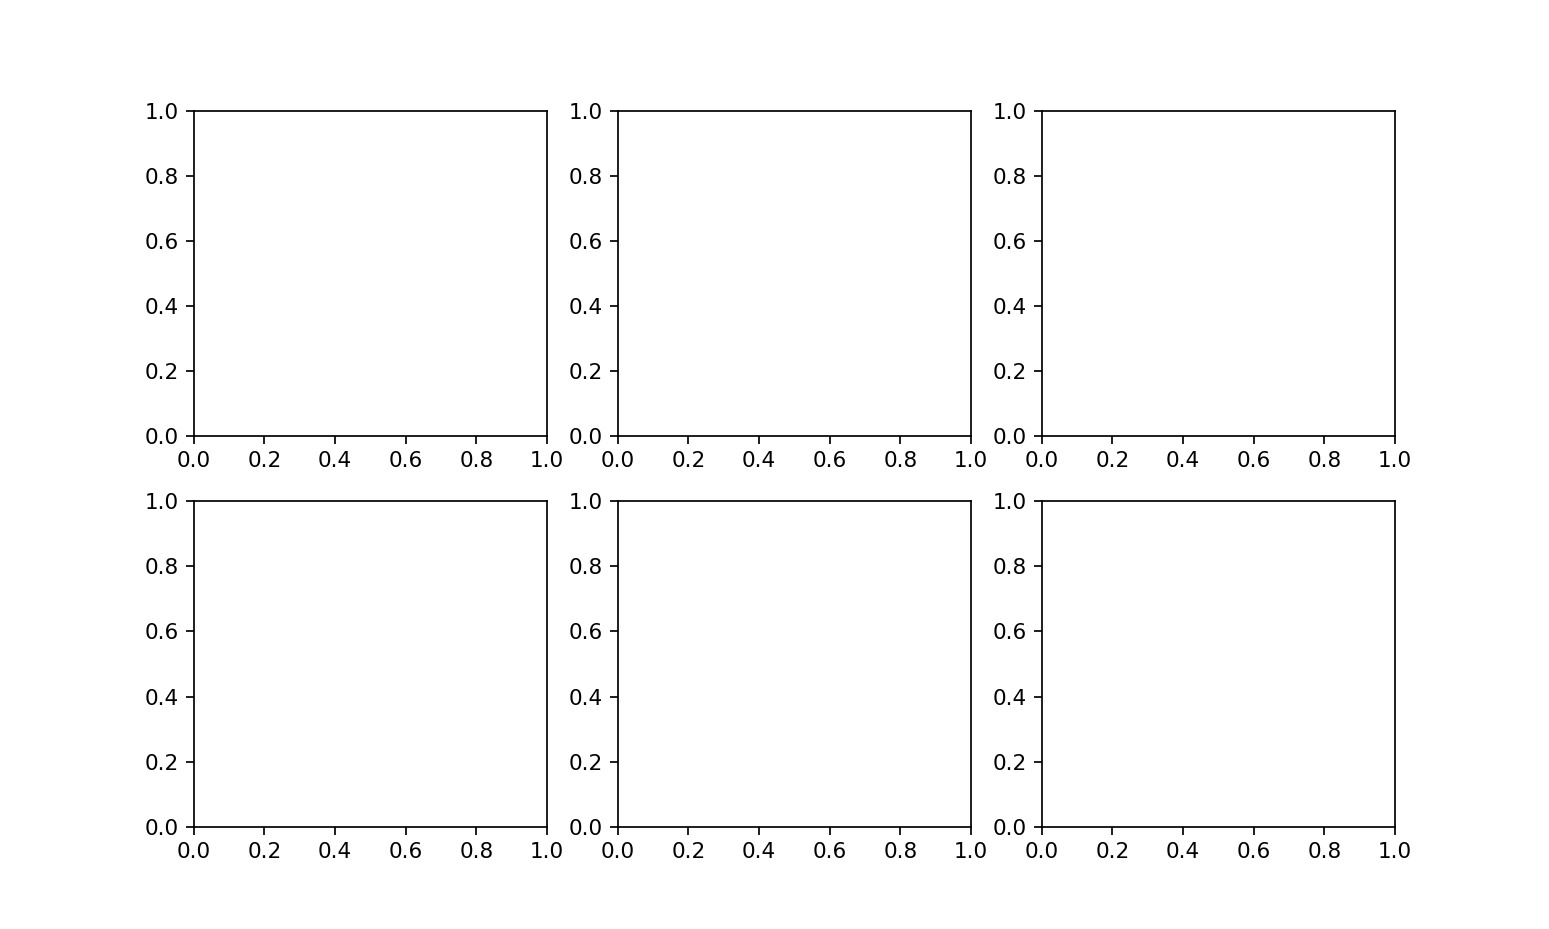

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DB959A9E8>,
      dtype=object)

In [32]:
fig, axes = plt.subplots(2, 3)
axes

这是⾮常实⽤的，因为可以轻松地对axes数组进⾏索引，就好像
是⼀个⼆维数组⼀样，例如axes[0,1]。你还可以通过sharex和
sharey指定subplot应该具有相同的X轴或Y轴。在⽐较相同范围
的数据时，这也是⾮常实⽤的，否则， matplotlib会⾃动缩放各
图表的界限。

#### 调整subplot周围的间距 Adjusting the spacing around subplots

* 默认情况下， matplotlib会在subplot外围留下⼀定的边距，并在
subplot之间留下⼀定的间距。间距跟图像的⾼度和宽度有关，因
此，如果你调整了图像⼤⼩（不管是编程还是⼿⼯），间距也会
⾃动调整。利⽤Figure的subplots_adjust⽅法可以轻⽽易举地修
改间距，此外，它也是个顶级函数：

In [ ]:
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

* wspace和hspace⽤于控制宽度和⾼度的百分⽐，可以⽤作
subplot之间的间距。下⾯是⼀个简单的例⼦，其中我将间距收缩
到了0（如图9-5所示）：

<IPython.core.display.Javascript object>


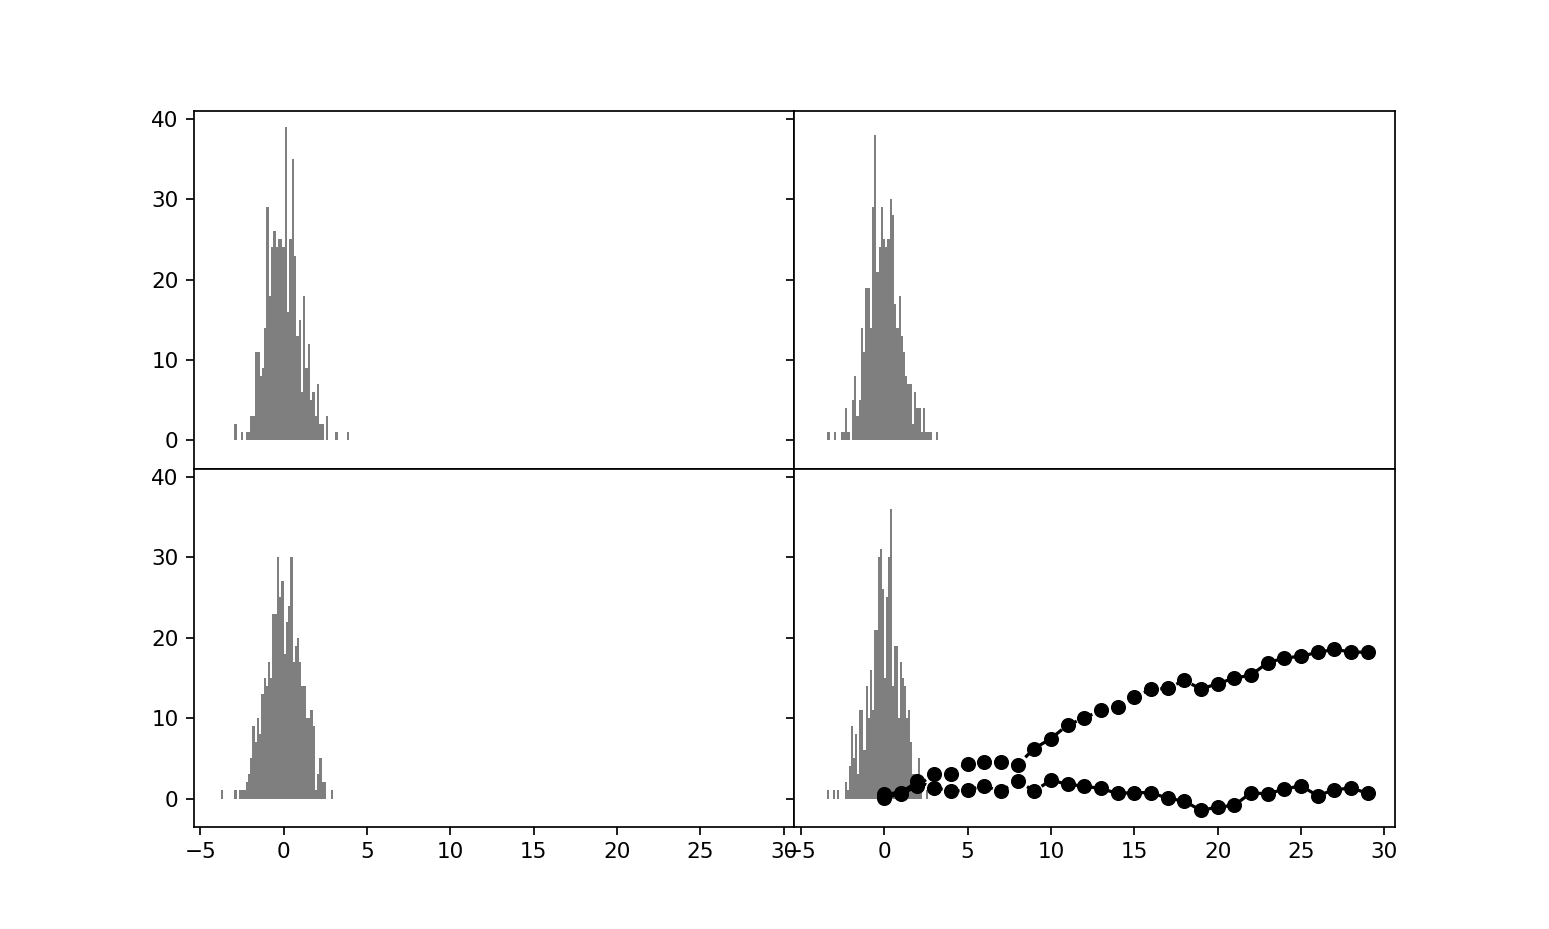

In [36]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜⾊、标记和线型 Colors, Markers, and Line Styles

* matplotlib的plot函数接受⼀组X和Y坐标，还可以接受⼀个表示颜
⾊和线型的字符串缩写。例如，要根据x和y绘制绿⾊虚线，你可
以执⾏如下代码：

In [ ]:
ax.plot(x, y, 'g--')

这种在⼀个字符串中指定颜⾊和线型的⽅式⾮常⽅便。在实际
中，如果你是⽤代码绘图，你可能不想通过处理字符串来获得想
要的格式。通过下⾯这种更为明确的⽅式也能得到同样的效果：

In [ ]:
ax.plot(x, y, linestyle='--', color='g')

常⽤的颜⾊可以使⽤颜⾊缩写，你也可以指定颜⾊码（例
如， '#CECECE'）。你可以通过查看plot的⽂档字符串查看所有
线型的合集（在IPython和Jupyter中使⽤plot?）。
线图可以使⽤标记强调数据点。因为matplotlib可以创建连续线
图，在点之间进⾏插值，因此有时可能不太容易看出真实数据点
的位置。标记也可以放到格式字符串中，但标记类型和线型必须
放在颜⾊后⾯（⻅图9-6）

In [43]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

In [ ]:
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

在线型图中，⾮实际数据点默认是按线性⽅式插值的。可以通过
drawstyle选项修改（⻅图9-7）：

In [45]:
plt.close('all')

<IPython.core.display.Javascript object>


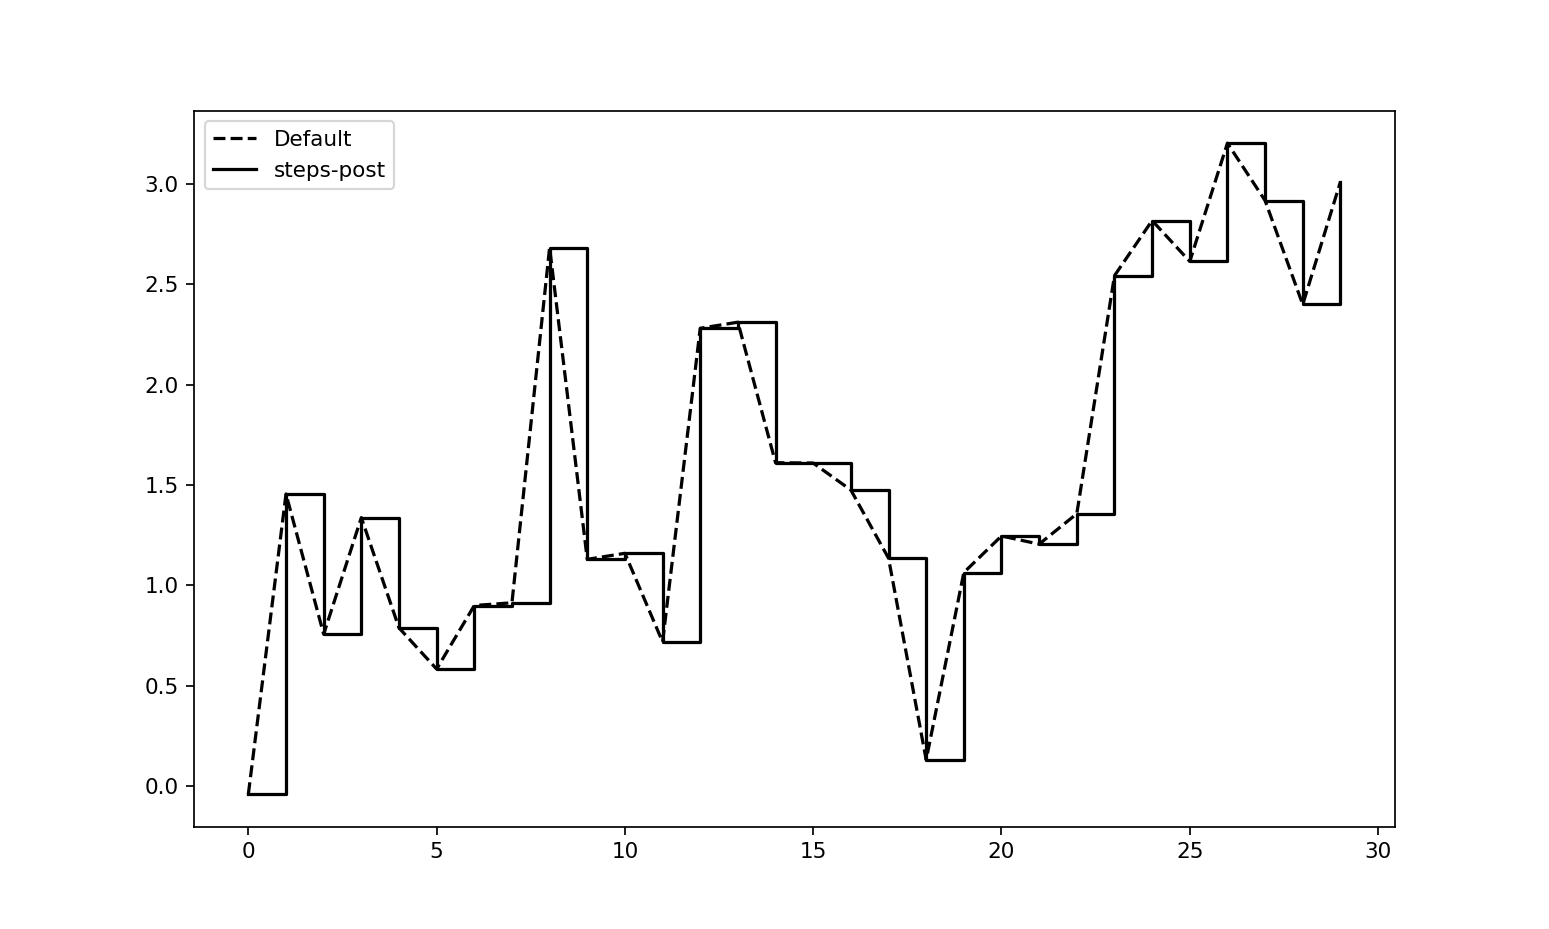

In [46]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

* 你可能注意到运⾏上⾯代码时有输出<matplotlib.lines.Line2D at
...>。 matplotlib会返回引⽤了新添加的⼦组件的对象。⼤多数时
候，你可以放⼼地忽略这些输出。这⾥，因为我们传递了label参
数到plot，我们可以创建⼀个plot图例，指明每条使⽤plt.legend
的线。

* 你必须调⽤plt.legend（或使⽤ax.legend，如果引⽤了
轴的话）来创建图例，⽆论你绘图时是否传递label标签选
项。

### 刻度、标签和图例 Ticks, Labels, and Legends

对于⼤多数的图表装饰项，其主要实现⽅式有⼆：使⽤过程型的
pyplot接⼝（例如， matplotlib.pyplot）以及更为⾯向对象的原⽣
matplotlib API。

pyplot接⼝的设计⽬的就是交互式使⽤，含有诸如xlim、 xticks和
xticklabels之类的⽅法。它们分别控制图表的范围、刻度位置、
刻度标签等。其使⽤⽅式有以下两种：

* 调⽤时不带参数，则返回当前的参数值（例如， plt.xlim()返回
当前的X轴绘图范围）。

* 调⽤时带参数，则设置参数值（例如， plt.xlim([0,10])会将X轴
的范围设置为0到10）。

所有这些⽅法都是对当前或最近创建的AxesSubplot起作⽤的。
它们各⾃对应subplot对象上的两个⽅法，以xlim为例，就是
ax.get_xlim和ax.set_xlim。我更喜欢使⽤subplot的实例⽅法
（因为我喜欢明确的事情，⽽且在处理多个subplot时这样也更清
楚⼀些）。当然你完全可以选择⾃⼰觉得⽅便的那个。

#### 设置标题、轴标签、刻度以及刻度标签 Setting the title, axis labels, ticks, and ticklabels

* 为了说明⾃定义轴，我将创建⼀个简单的图像并绘制⼀段随机漫
步（如图9-8所示）

<IPython.core.display.Javascript object>


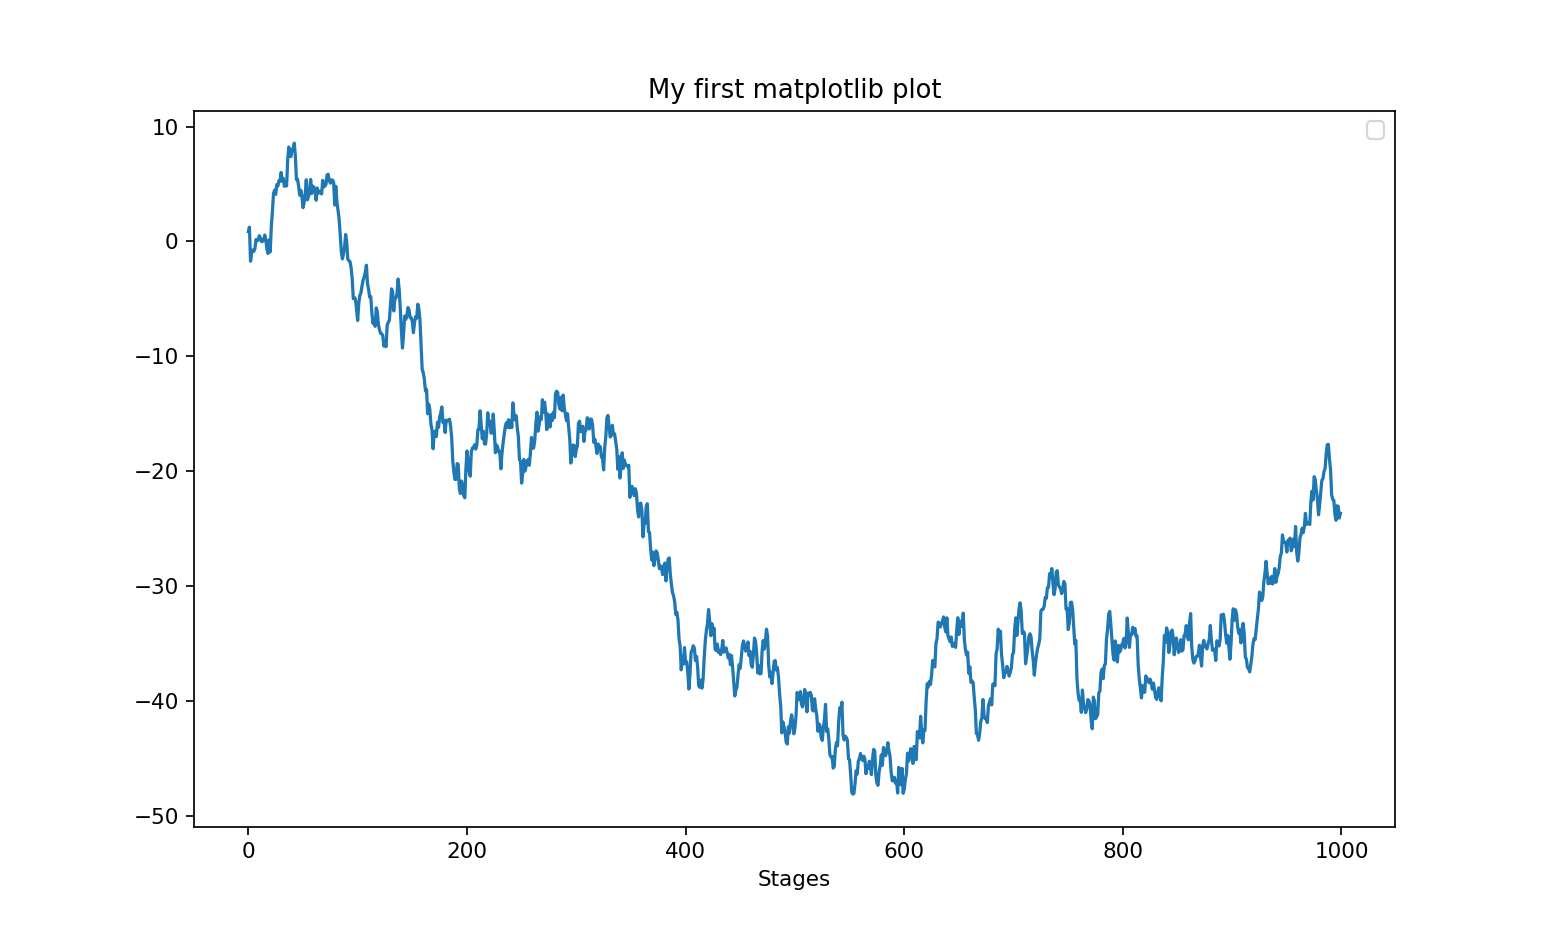

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

* 要改变x轴刻度，最简单的办法是使⽤set_xticks和
set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的
哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以
通过set_xticklabels将任何其他的值⽤作标签

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

rotation选项设定x刻度标签倾斜30度。最后，再⽤set_xlabel为X
轴设置⼀个名称，并⽤set_title设置⼀个标题（⻅图9-9的结
果）：

In [50]:
ax.set_title('My first matplotlib plot')b

Text(0.5,58.6194,'Stages')

In [51]:
ax.set_xlabel('Stages')

Text(0.5,58.6194,'Stages')

* Y轴的修改⽅式与此类似，只需将上述代码中的x替换为y即可。
轴的类有集合⽅法，可以批量设定绘图选项。前⾯的例⼦，也可
以写为：

In [52]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,58.6194,'Stages'), Text(0.5,1,'My first matplotlib plot')]

####  添加图例 Adding legends

* 图例（legend）是另⼀种⽤于标识图表元素的重要⼯具。添加图
例的⽅式有多种。最简单的是在添加subplot的时候传⼊label参
数：

<IPython.core.display.Javascript object>


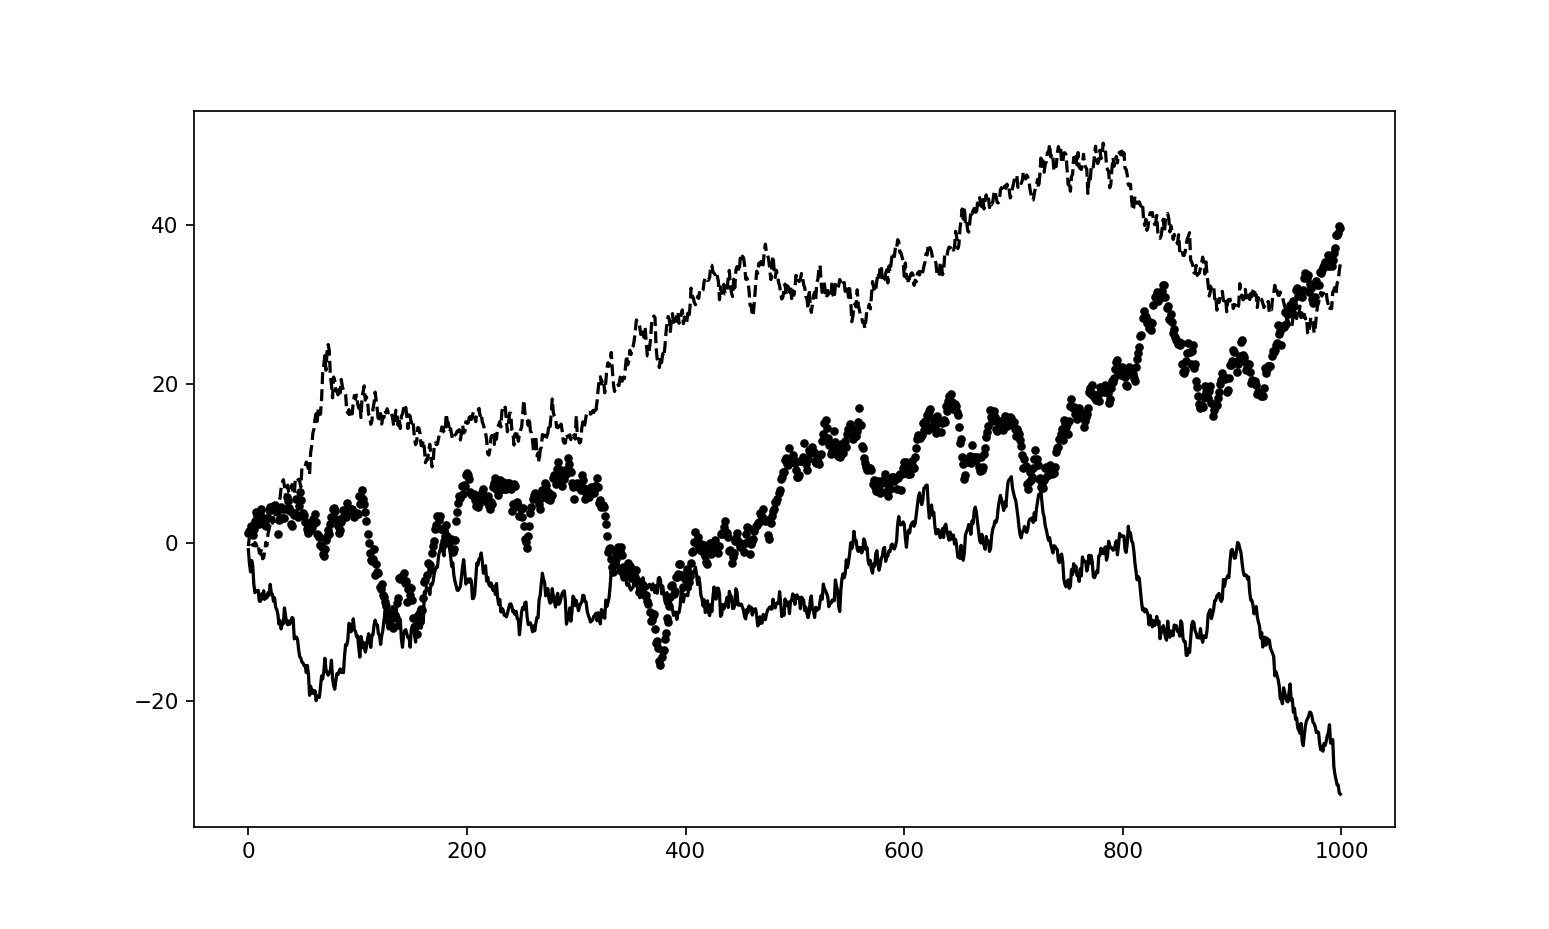

In [17]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

* 在此之后，你可以调⽤ax.legend()或plt.legend()来⾃动创建图例

In [53]:
ax.legend(loc='best')

No handles with labels found to put in legend.


legend⽅法有⼏个其它的loc位置参数选项。请查看⽂档字符串
（使⽤ax.legend?）。

loc告诉matplotlib要将图例放在哪。如果你不是吹⽑求疵的
话， "best"是不错的选择，因为它会选择最不碍事的位置。要从
图例中去除⼀个或多个元素，不传⼊label或传⼊
label='nolegend'即可。（中⽂第⼀版这⾥把best错写成了beat）

### 注解以及在Subplot上绘图Annotations and Drawing on a Subplot

除标准的绘图类型，你可能还希望绘制⼀些⼦集的注解，可能是
⽂本、箭头或其他图形等。注解和⽂字可以通过text、 arrow和
annotate函数进⾏添加。 text可以将⽂本绘制在图表的指定坐标
(x,y)，还可以加上⼀些⾃定义格式：

In [ ]:
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

注解中可以既含有⽂本也含有箭头。例如，我们根据最近的标准
普尔500指数价格（来⾃Yahoo!Finance）绘制⼀张曲线图，并
标出2008年到2009年⾦融危机期间的⼀些重要⽇期。你可以在
Jupyter notebook的⼀个⼩窗中试验这段代码（图9-11是结
果）：

<IPython.core.display.Javascript object>


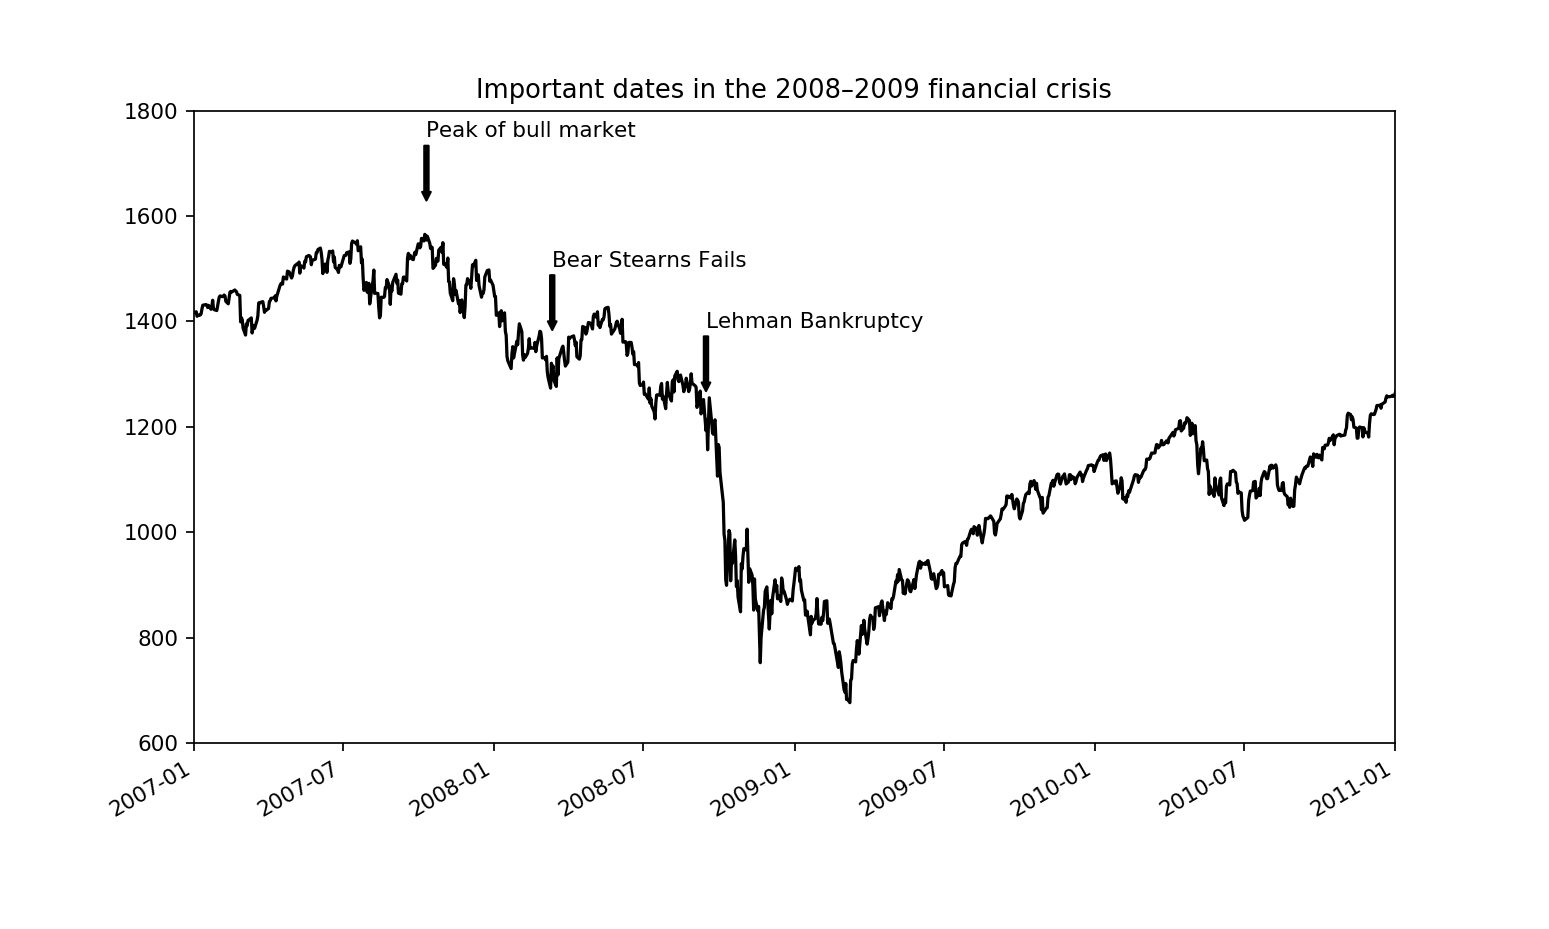

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

In [55]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('G:/test/pydata-book/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

这张图中有⼏个重要的点要强调： ax.annotate⽅法可以在指定的
x和y坐标轴绘制标签。我们使⽤set_xlim和set_ylim⼈⼯设定起
始和结束边界，⽽不使⽤matplotlib的默认⽅法。最后，⽤
ax.set_title添加图标标题。

更多有关注解的示例，请访问matplotlib的在线示例库。
图形的绘制要麻烦⼀些。 matplotlib有⼀些表示常⻅图形的对
象。这些对象被称为块（patch）。其中有些（如Rectangle和
Circle），可以在matplotlib.pyplot中找到，但完整集合位于
matplotlib.patches。

要在图表中添加⼀个图形，你需要创建⼀个块对象shp，然后通
过ax.add_patch(shp)将其添加到subplot中（如图9-12所示）

In [56]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Text(0.5,1,'Important dates in the 2008–2009 financial crisis')

<IPython.core.display.Javascript object>


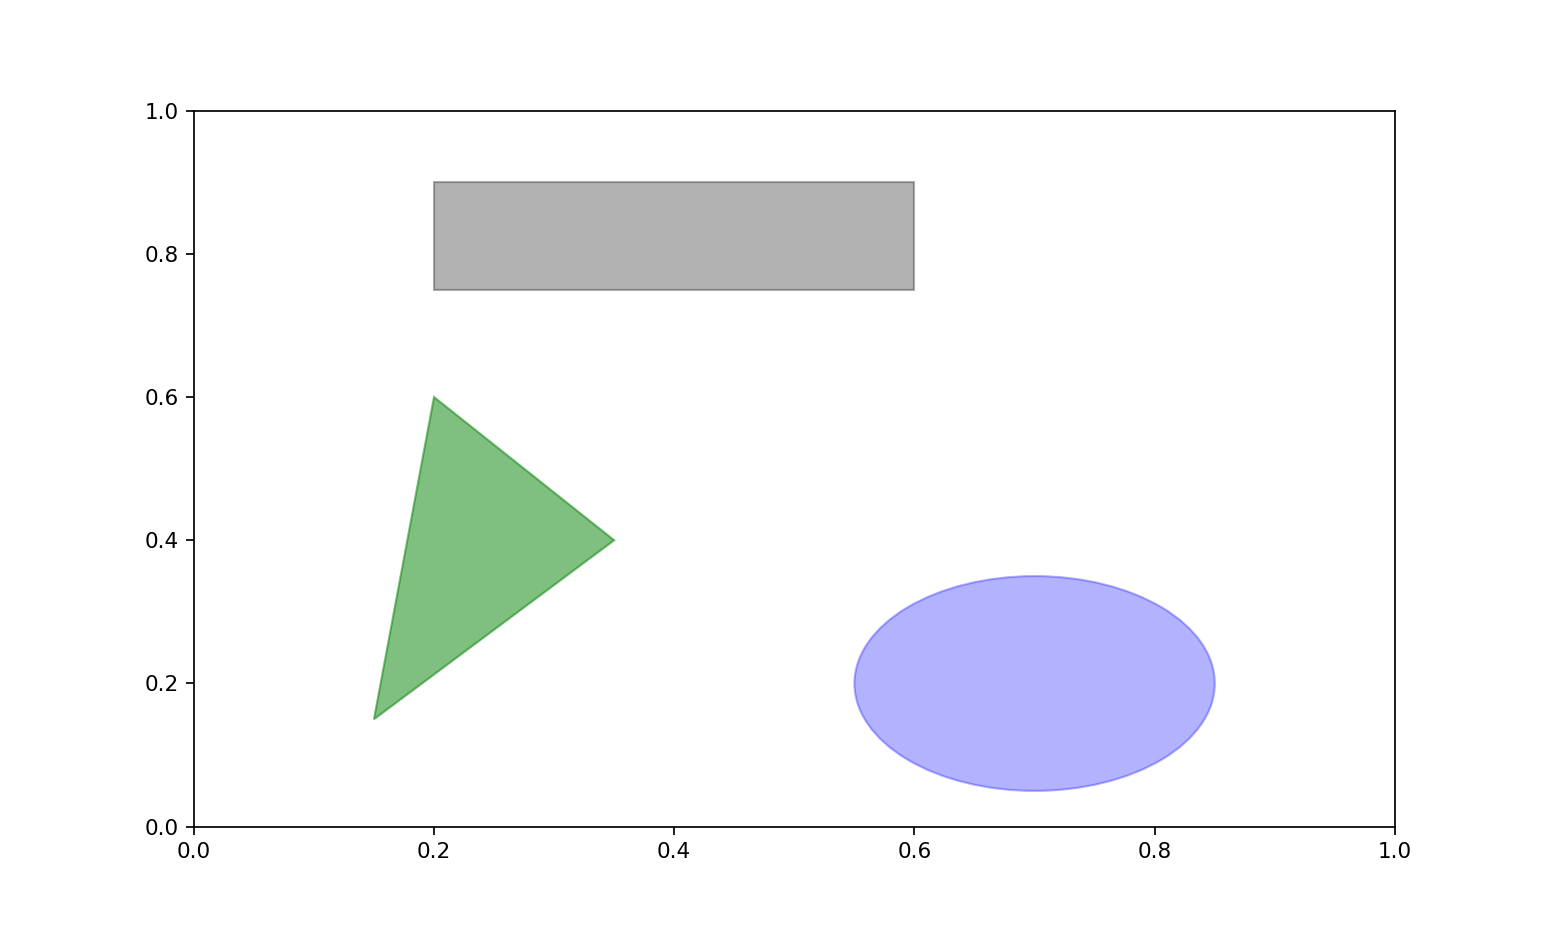

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

* 如果查看许多常⻅图表对象的具体实现代码，你就会发现它们其
实就是由块patch组装⽽成的。

### 将图表保存到⽂件 Saving Plots to File

利⽤plt.savefig可以将当前图表保存到⽂件。该⽅法相当于
Figure对象的实例⽅法savefig。例如，要将图表保存为SVG⽂
件，你只需输⼊：

In [59]:
plt.savefig('figpath.svg')

⽂件类型是通过⽂件扩展名推断出来的。因此，如果你使⽤的
是.pdf，就会得到⼀个PDF⽂件。我在发布图⽚时最常⽤到两个
重要的选项是dpi（控制“每英⼨点数”分辨率）和
bbox_inches（可以剪除当前图表周围的空⽩部分）。要得到⼀
张带有最⼩⽩边且分辨率为400DPI的PNG图⽚，你可以：

In [60]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

savefig并⾮⼀定要写⼊磁盘，也可以写⼊任何⽂件型的对象，⽐
如BytesIO：

In [61]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib配置 matplotlib Configuration

matplotlib⾃带⼀些配⾊⽅案，以及为⽣成出版质量的图⽚⽽设
定的默认配置信息。幸运的是，⼏乎所有默认⾏为都能通过⼀组
全局参数进⾏⾃定义，它们可以管理图像⼤⼩、 subplot边距、配
⾊⽅案、字体⼤⼩、⽹格类型等。⼀种Python编程⽅式配置系统
的⽅法是使⽤rc⽅法。例如，要将全局的图像默认⼤⼩设置为
10×10，你可以执⾏：

In [62]:
plt.rc('figure', figsize=(10, 10))

rc的第⼀个参数是希望⾃定义的对象，
如'figure'、 'axes'、 'xtick'、 'ytick'、 'grid'、 'legend'等。其后可以
跟上⼀系列的关键字参数。⼀个简单的办法是将这些选项写成⼀
个字典：

In [ ]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

要了解全部的⾃定义选项，请查阅matplotlib的配置⽂件
matplotlibrc（位于matplotlib/mpl-data⽬录中）。如果对该⽂件
进⾏了⾃定义，并将其放在你⾃⼰的.matplotlibrc⽬录中，则每
次使⽤matplotlib时就会加载该⽂件。

下⼀节，我们会看到， seaborn包有若⼲内置的绘图主题或类
型，它们使⽤了matplotlib的内部配置

## 9.2 使⽤pandas和seaborn绘图 Plotting with pandas and seaborn

matplotlib实际上是⼀种⽐较低级的⼯具。要绘制⼀张图表，你
组装⼀些基本组件就⾏：数据展示（即图表类型：线型图、柱状
图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以
及其他注解型信息。

在pandas中，我们有多列数据，还有⾏和列标签。 pandas⾃身
就有内置的⽅法，⽤于简化从DataFrame和Series绘制图形。另
⼀个库seaborn（https://seaborn.pydata.org/），由Michael
Waskom创建的静态图形库。 Seaborn简化了许多常⻅可视类型
的创建。

引⼊seaborn会修改matplotlib默认的颜⾊⽅案和绘图
类型，以提⾼可读性和美观度。即使你不使⽤seaborn API，
你可能也会引⼊seaborn，作为提⾼美观度和绘制常⻅
matplotlib图形的简化⽅法。

### 线型图 Line Plots

Series和DataFrame都有⼀个⽤于⽣成各类图表的plot⽅法。默
认情况下，它们所⽣成的是线型图（如图9-13所示）：

In [64]:
plt.close('all')

<IPython.core.display.Javascript object>


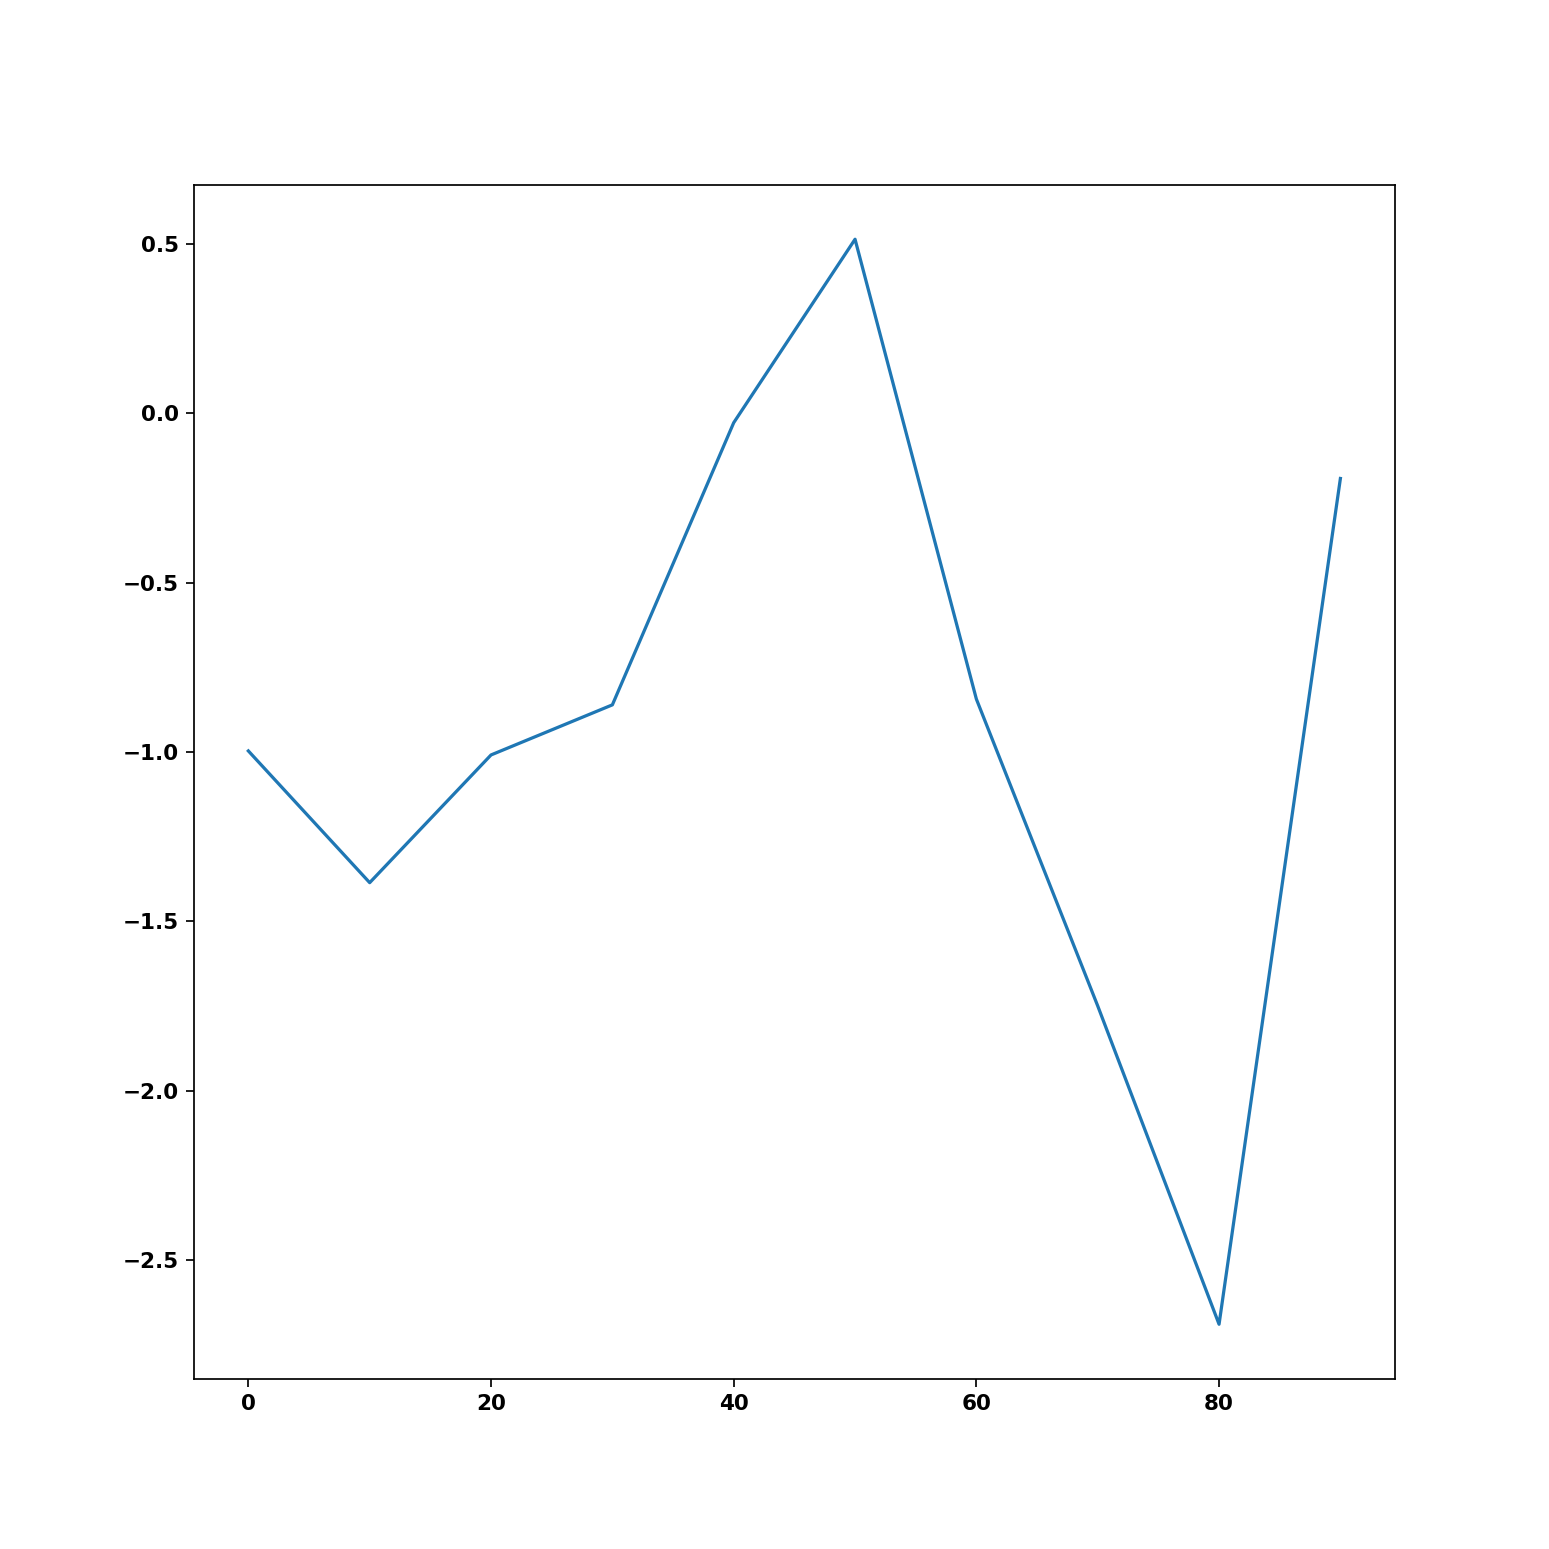

In [65]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

* 该Series对象的索引会被传给matplotlib，并⽤以绘制X轴。可以
通过use_index=False禁⽤该功能。 X轴的刻度和界限可以通过
xticks和xlim选项进⾏调节， Y轴就⽤yticks和ylim。 plot参数的完
整列表请参⻅表9-3。我只会讲解其中⼏个，剩下的就留给读者
⾃⼰去研究了。

pandas的⼤部分绘图⽅法都有⼀个可选的ax参数，它可以是⼀
个matplotlib的subplot对象。这使你能够在⽹格布局中更为灵活
地处理subplot的位置。

DataFrame的plot⽅法会在⼀个subplot中为各列绘制⼀条线，并
⾃动创建图例（如图9-14所示）：

<IPython.core.display.Javascript object>


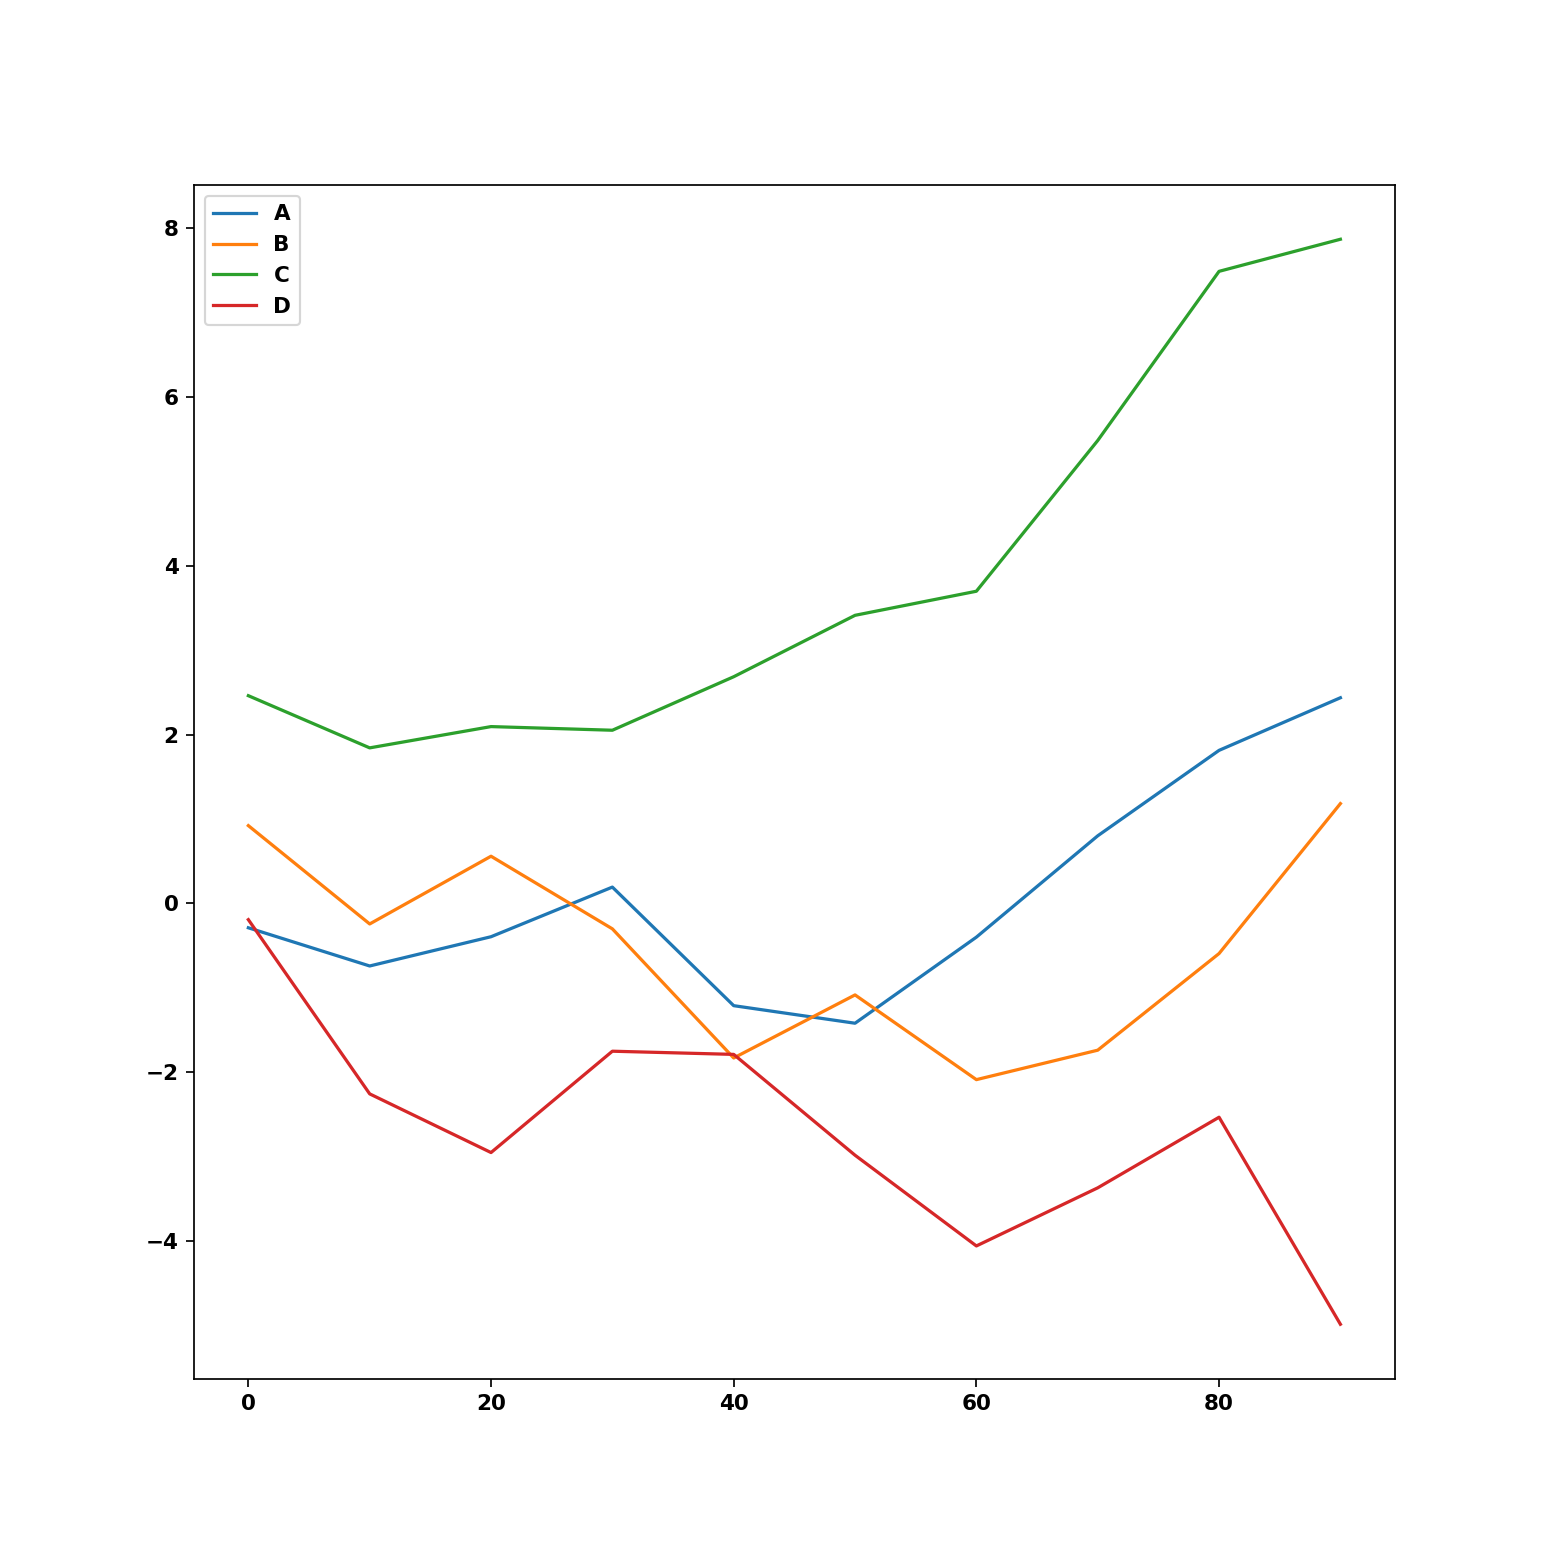

In [66]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### 柱状图 Bar Plots

* plot.bar()和plot.barh()分别绘制⽔平和垂直的柱状图。这时，
Series和DataFrame的索引将会被⽤作X（bar）或Y（barh）刻
度（如图9-15所示）：

<IPython.core.display.Javascript object>


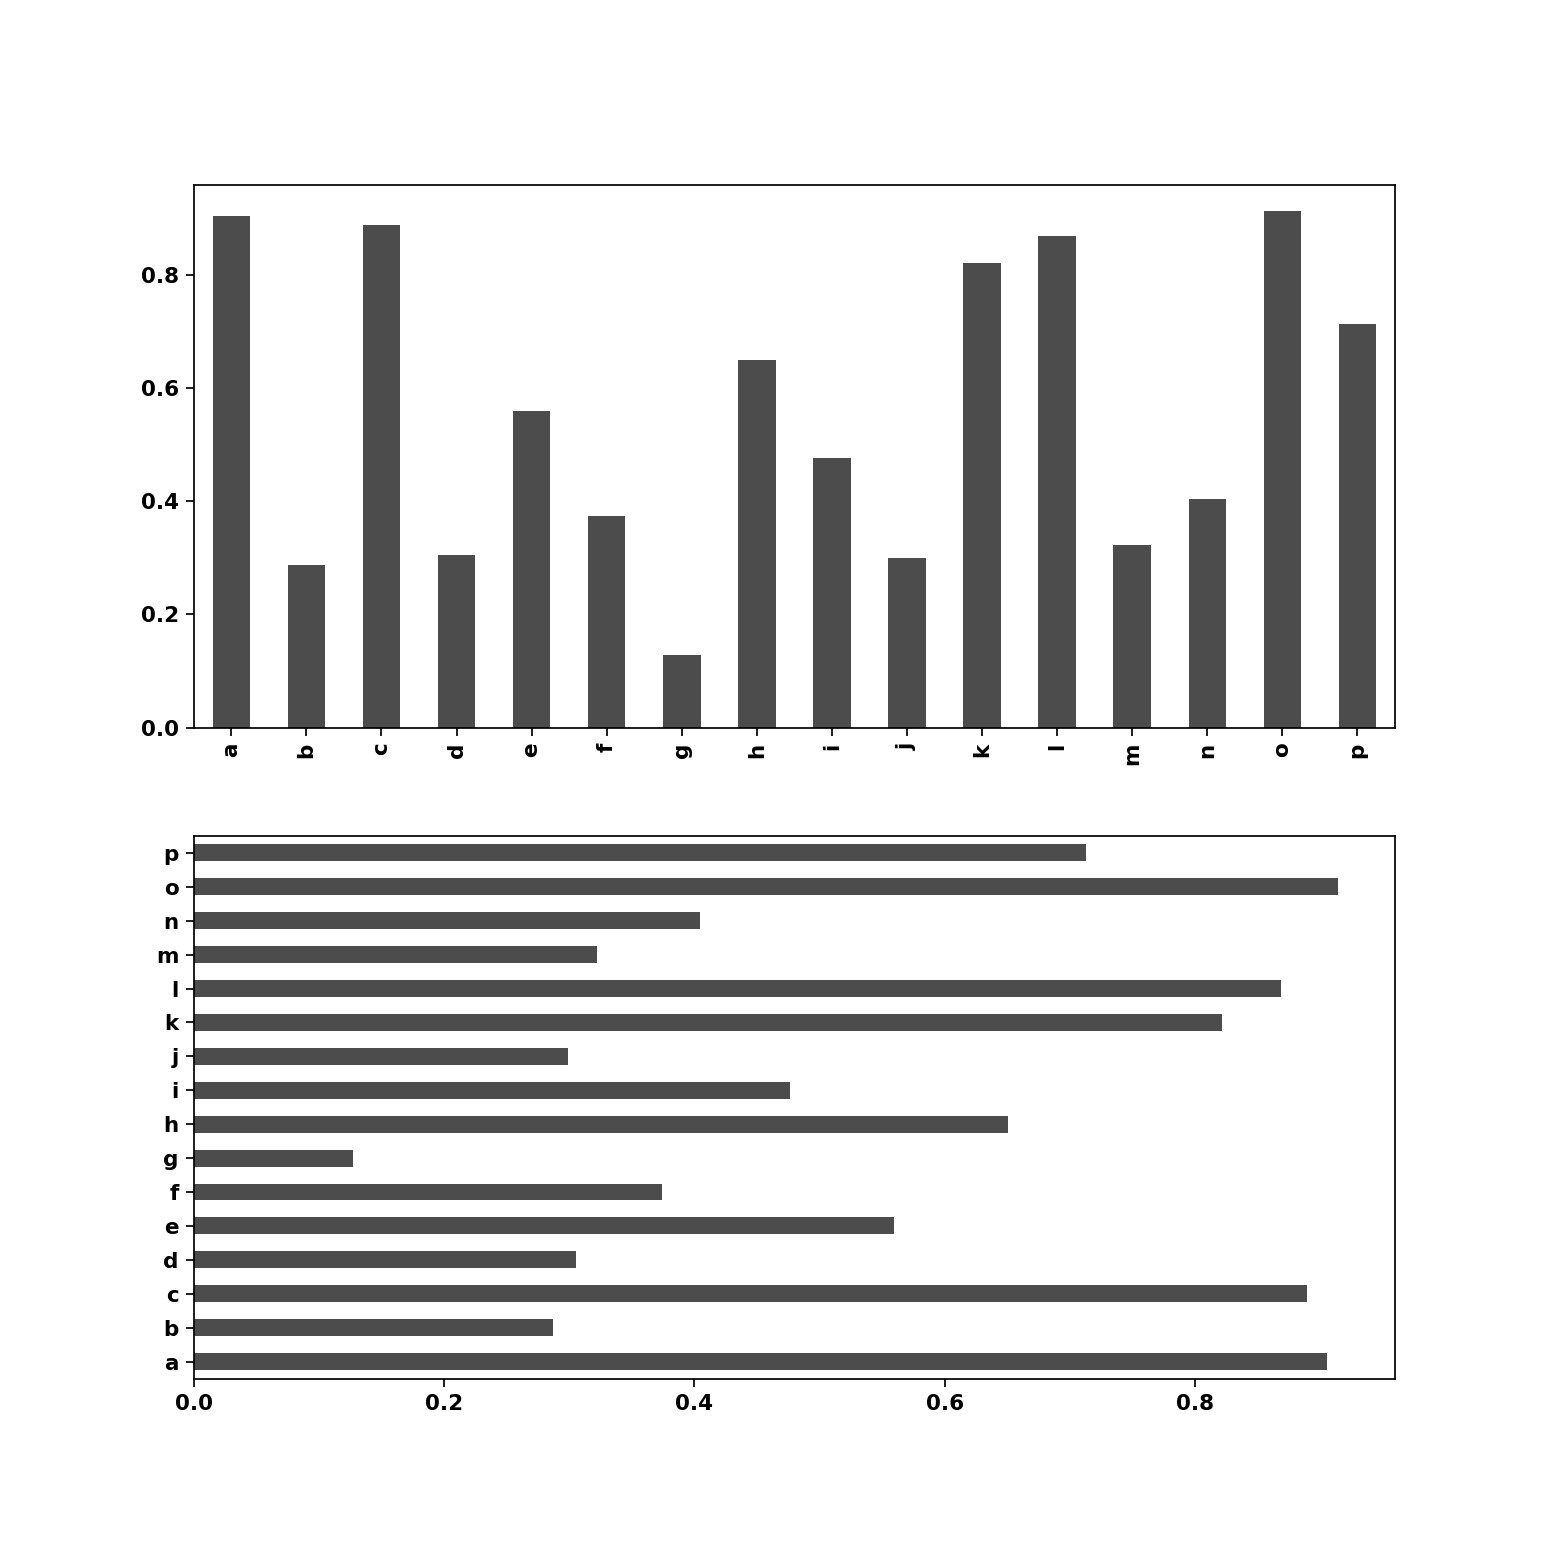

In [67]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [68]:
np.random.seed(12348)

<IPython.core.display.Javascript object>


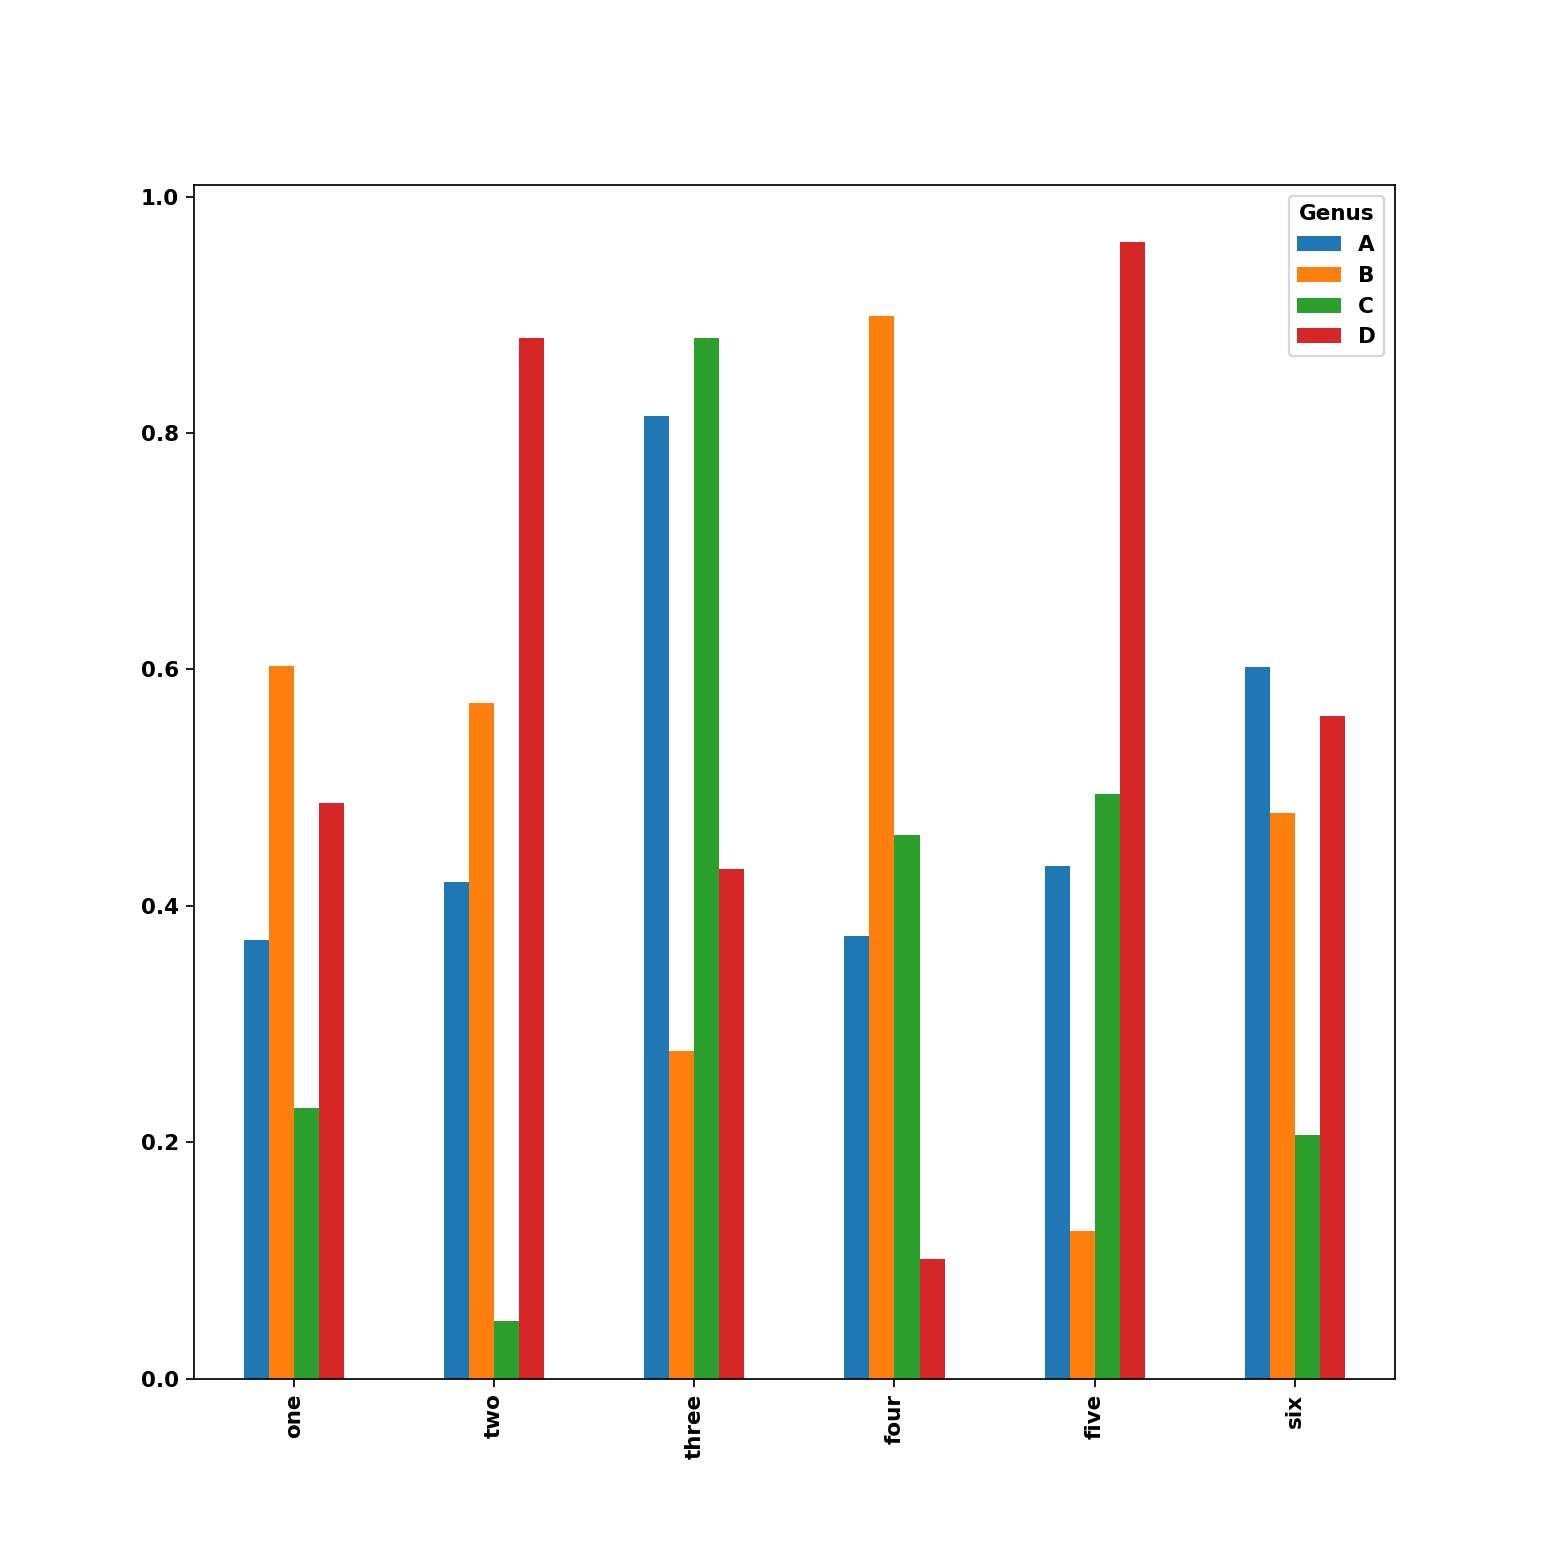

In [69]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

<IPython.core.display.Javascript object>


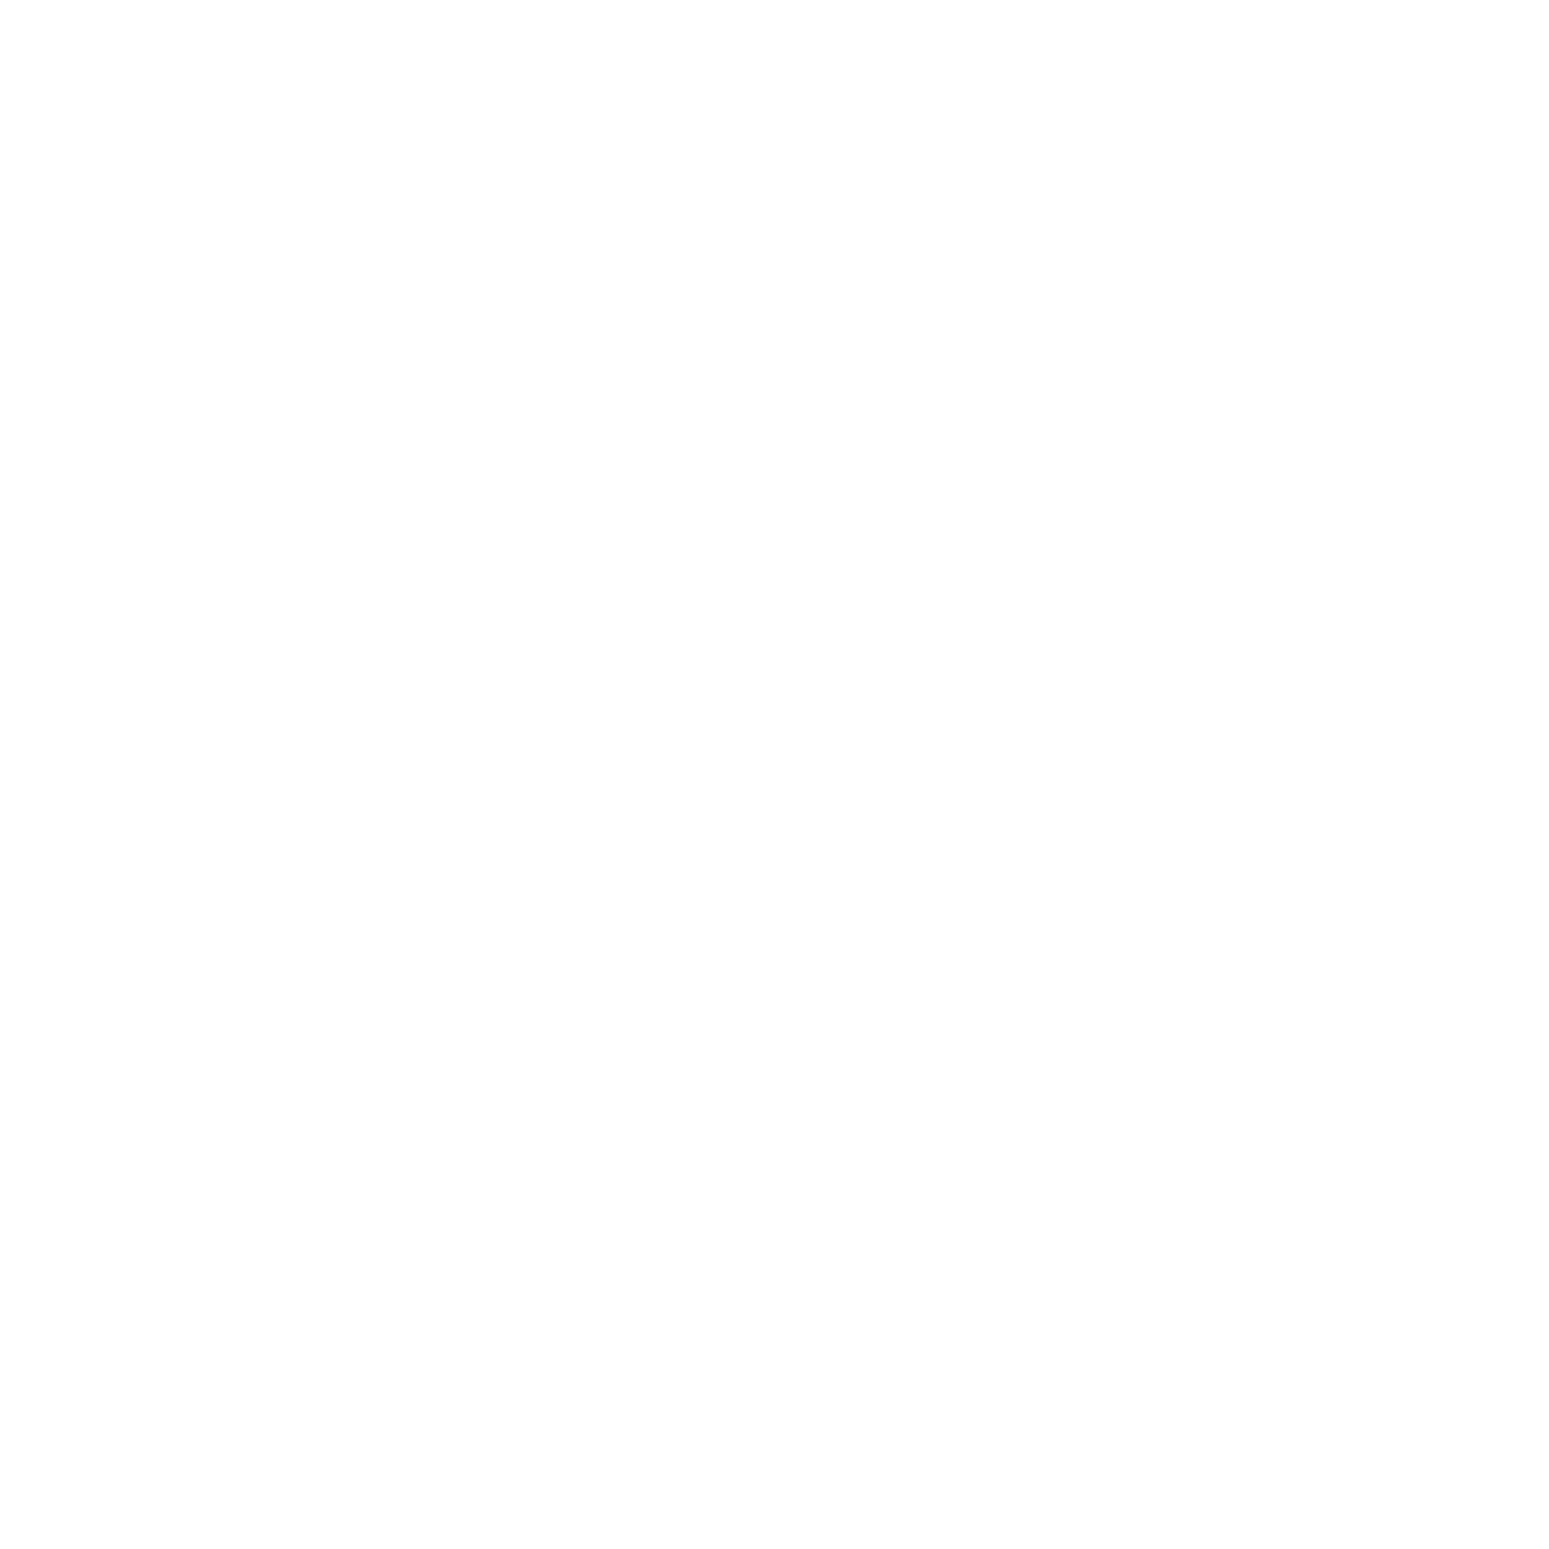

<IPython.core.display.Javascript object>


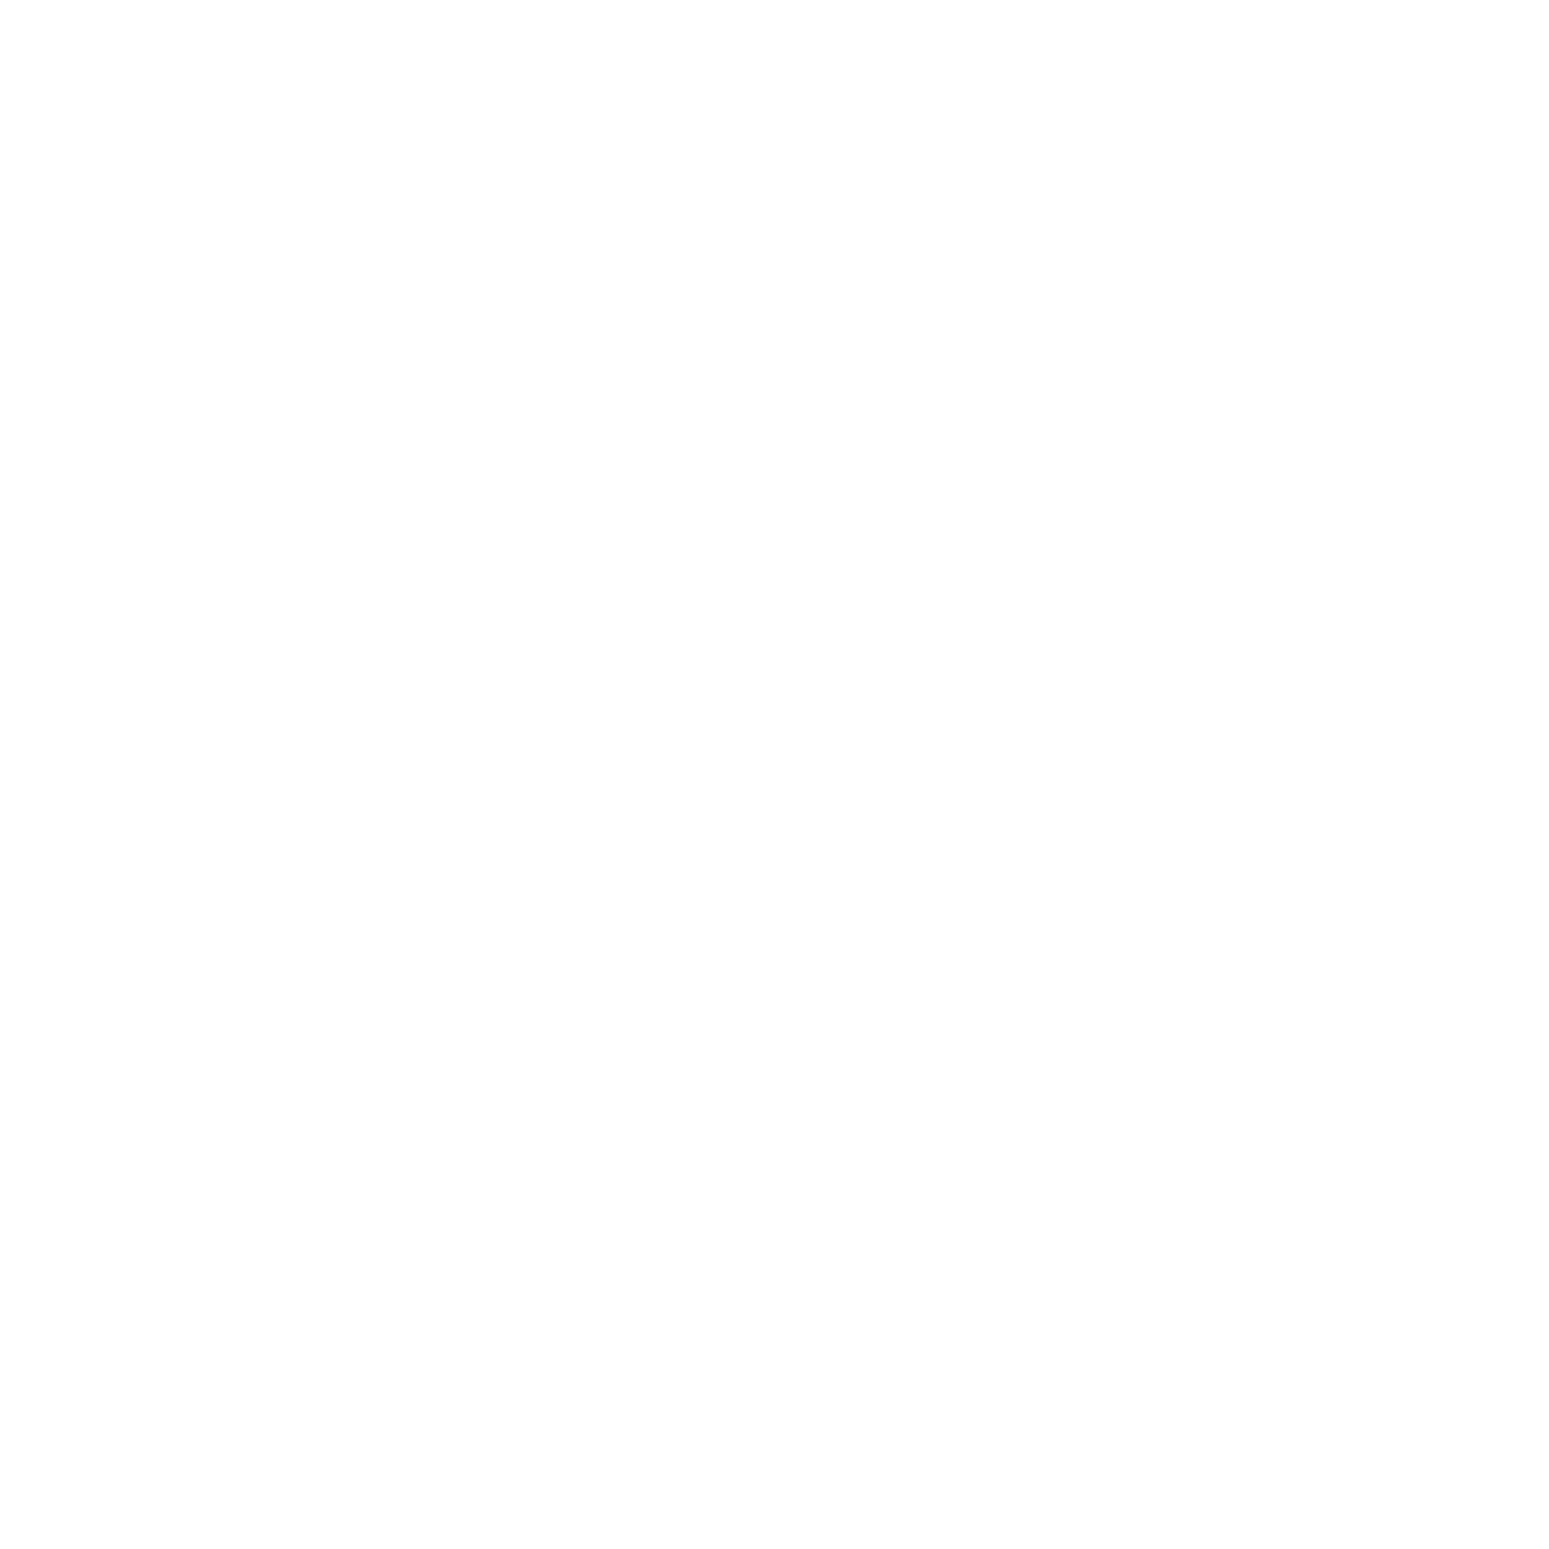

In [71]:
plt.figure()

<IPython.core.display.Javascript object>


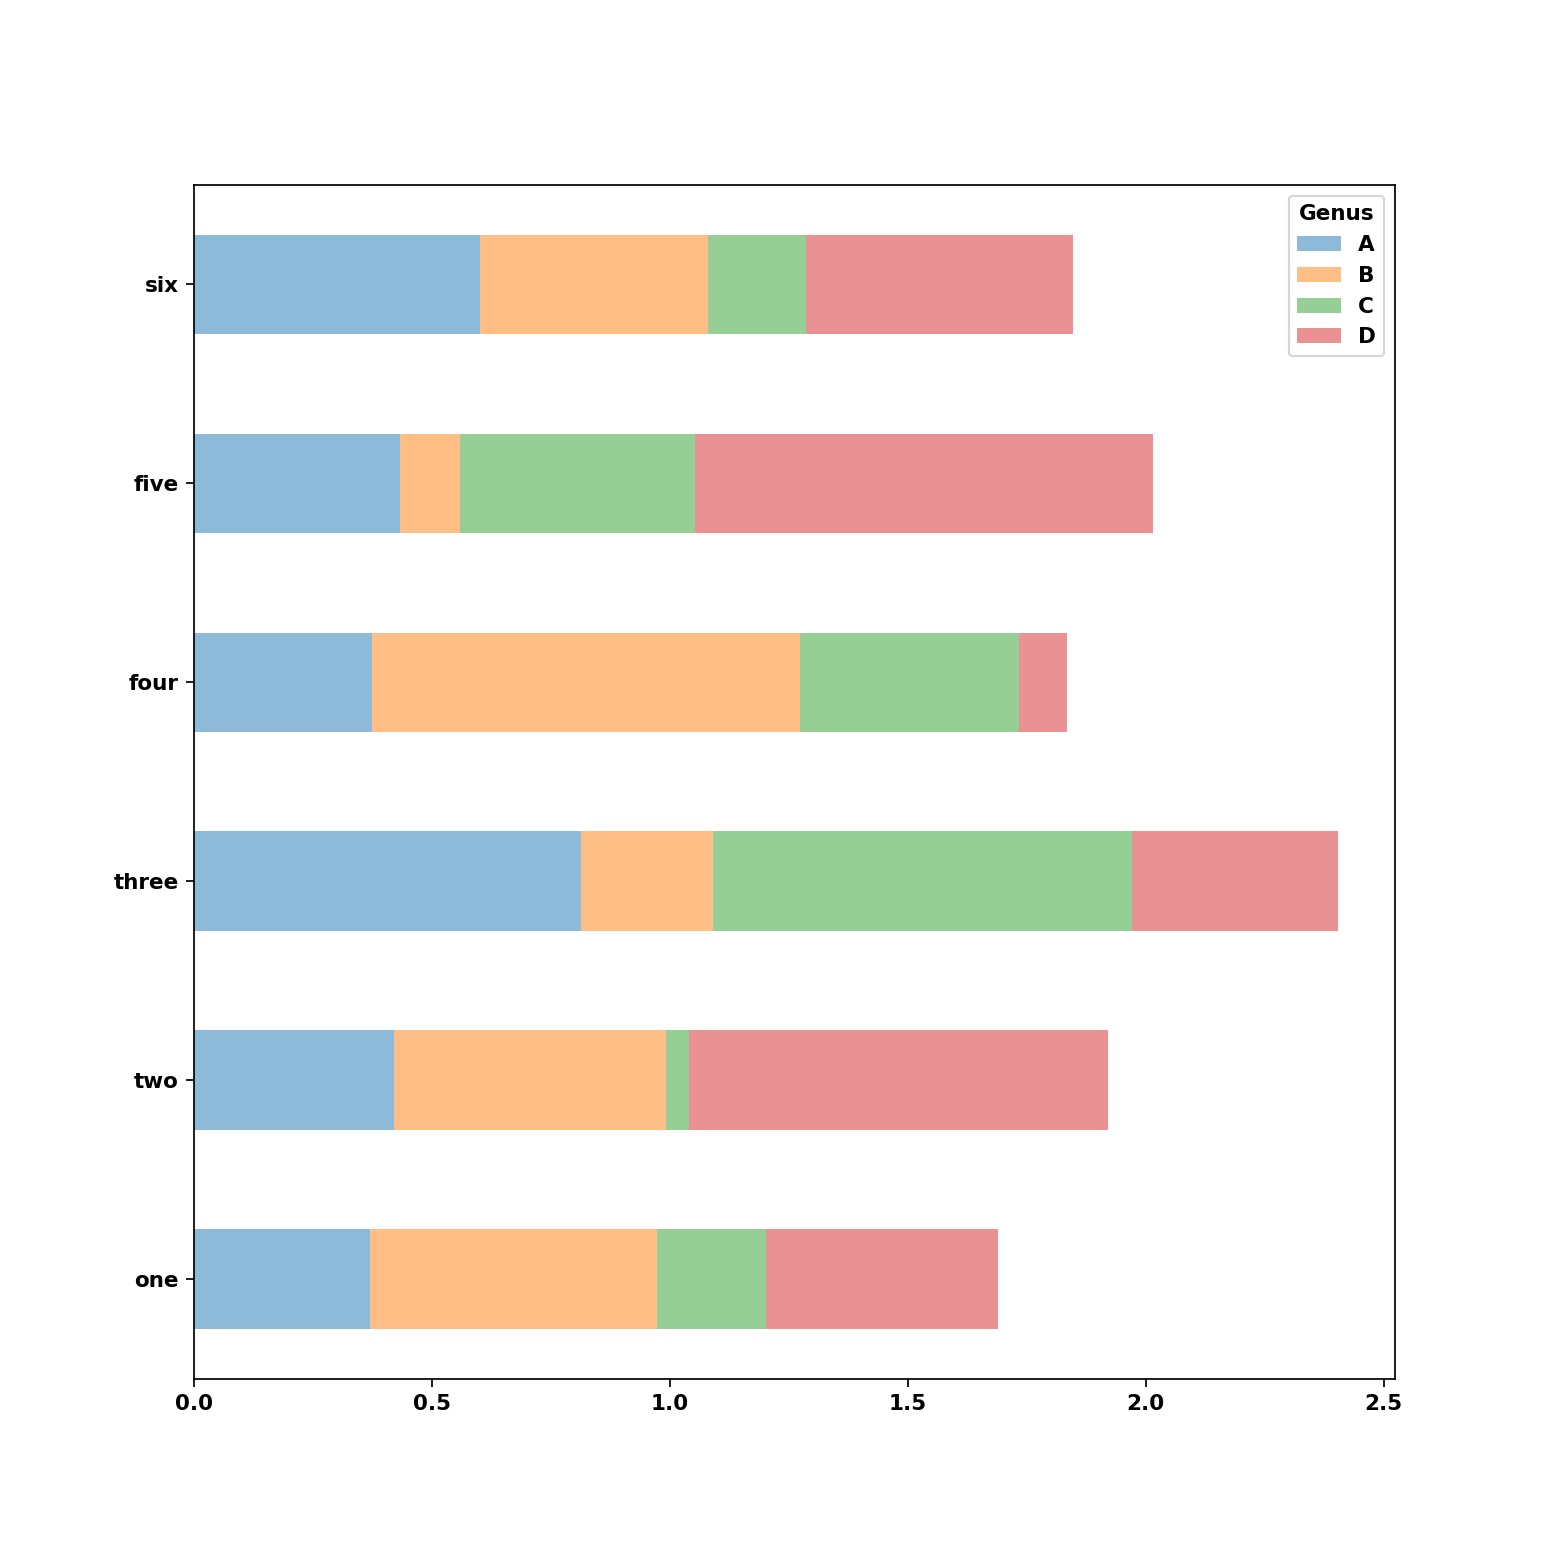

In [70]:
df.plot.barh(stacked=True, alpha=0.5)

In [72]:
plt.close('all')

In [74]:
tips = pd.read_csv('G:/test/pydata-book/examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

<IPython.core.display.Javascript object>


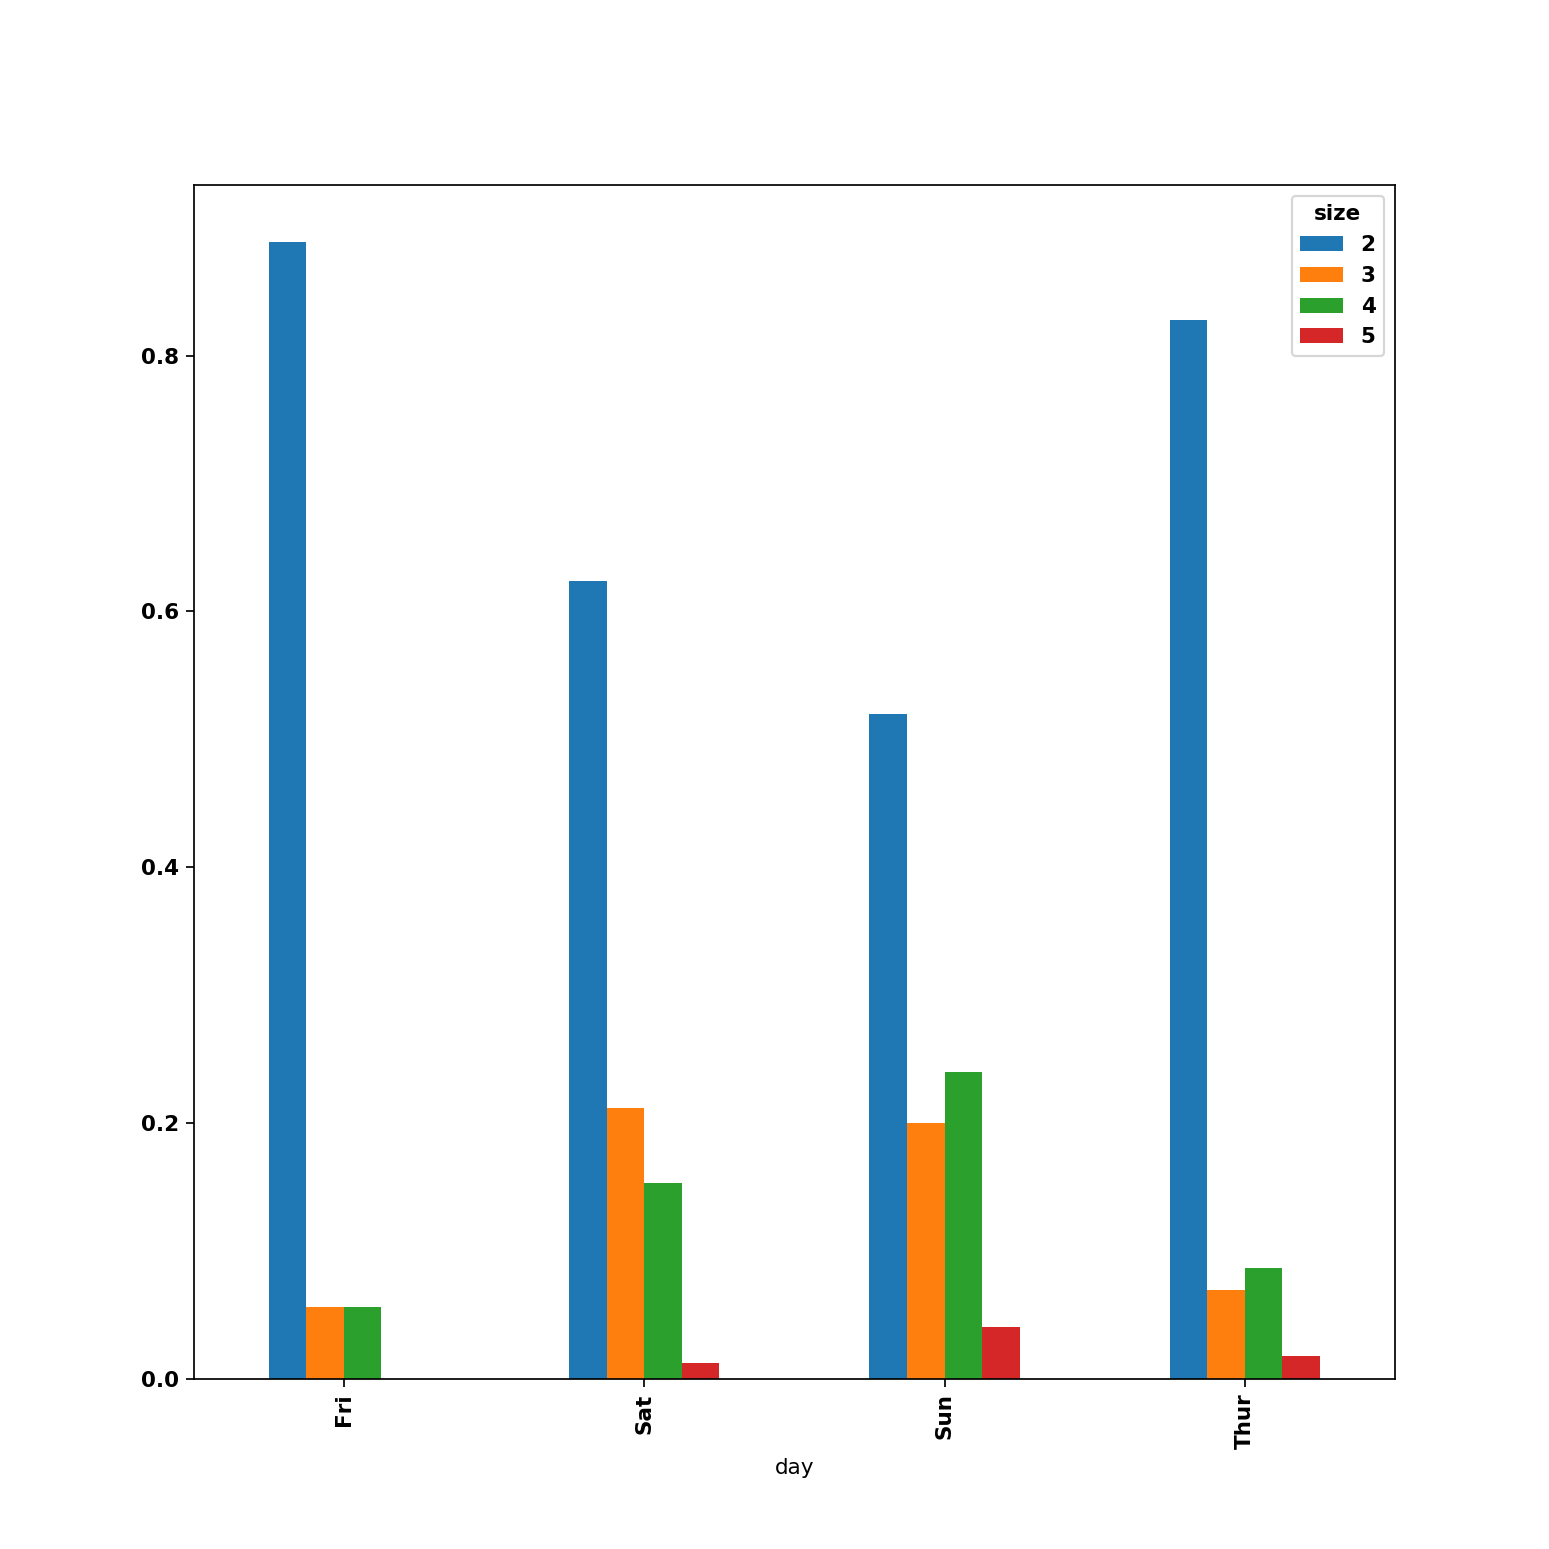

In [75]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [76]:
plt.close('all')

<IPython.core.display.Javascript object>


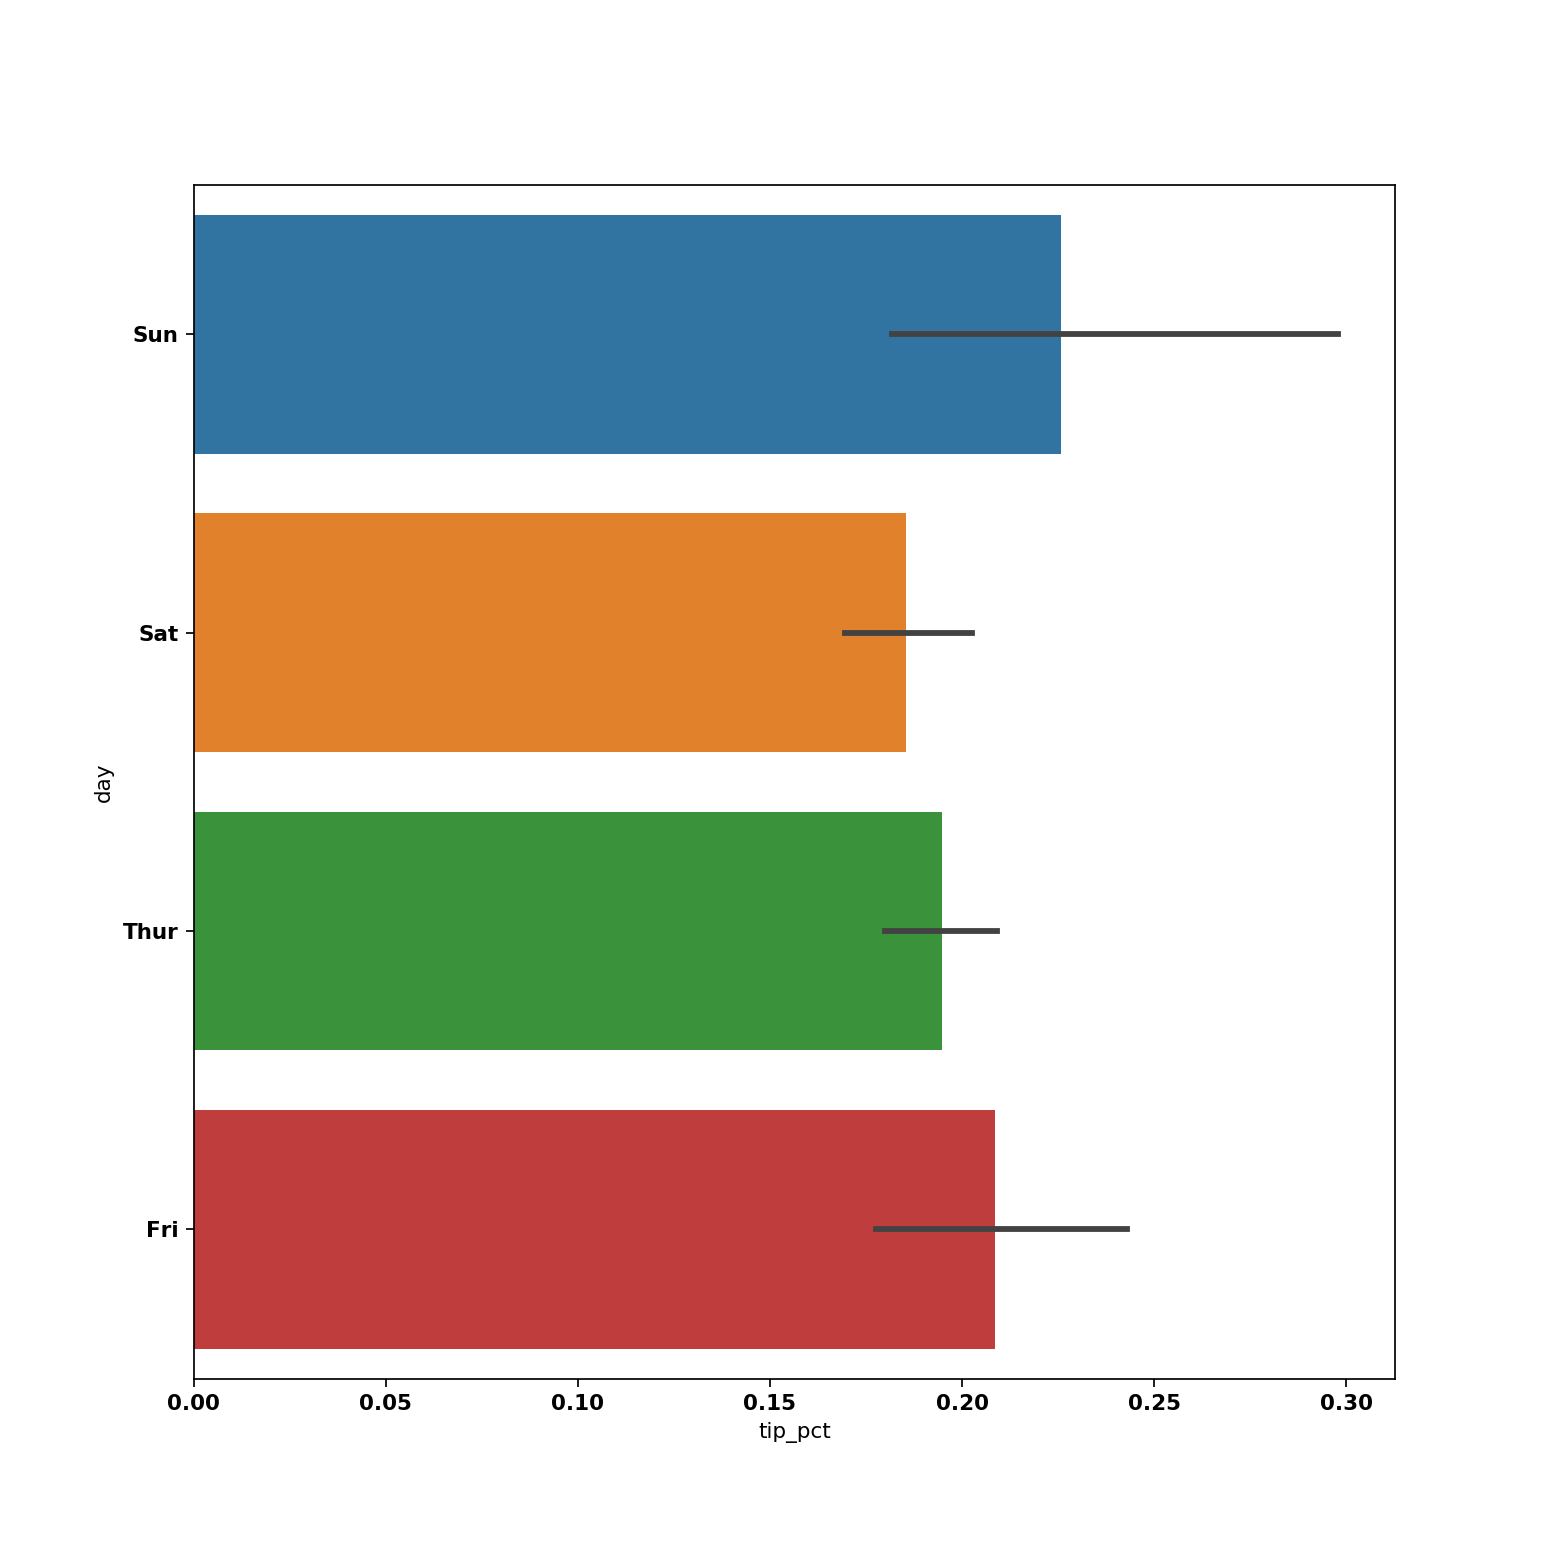

In [77]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [78]:
plt.close('all')

<IPython.core.display.Javascript object>


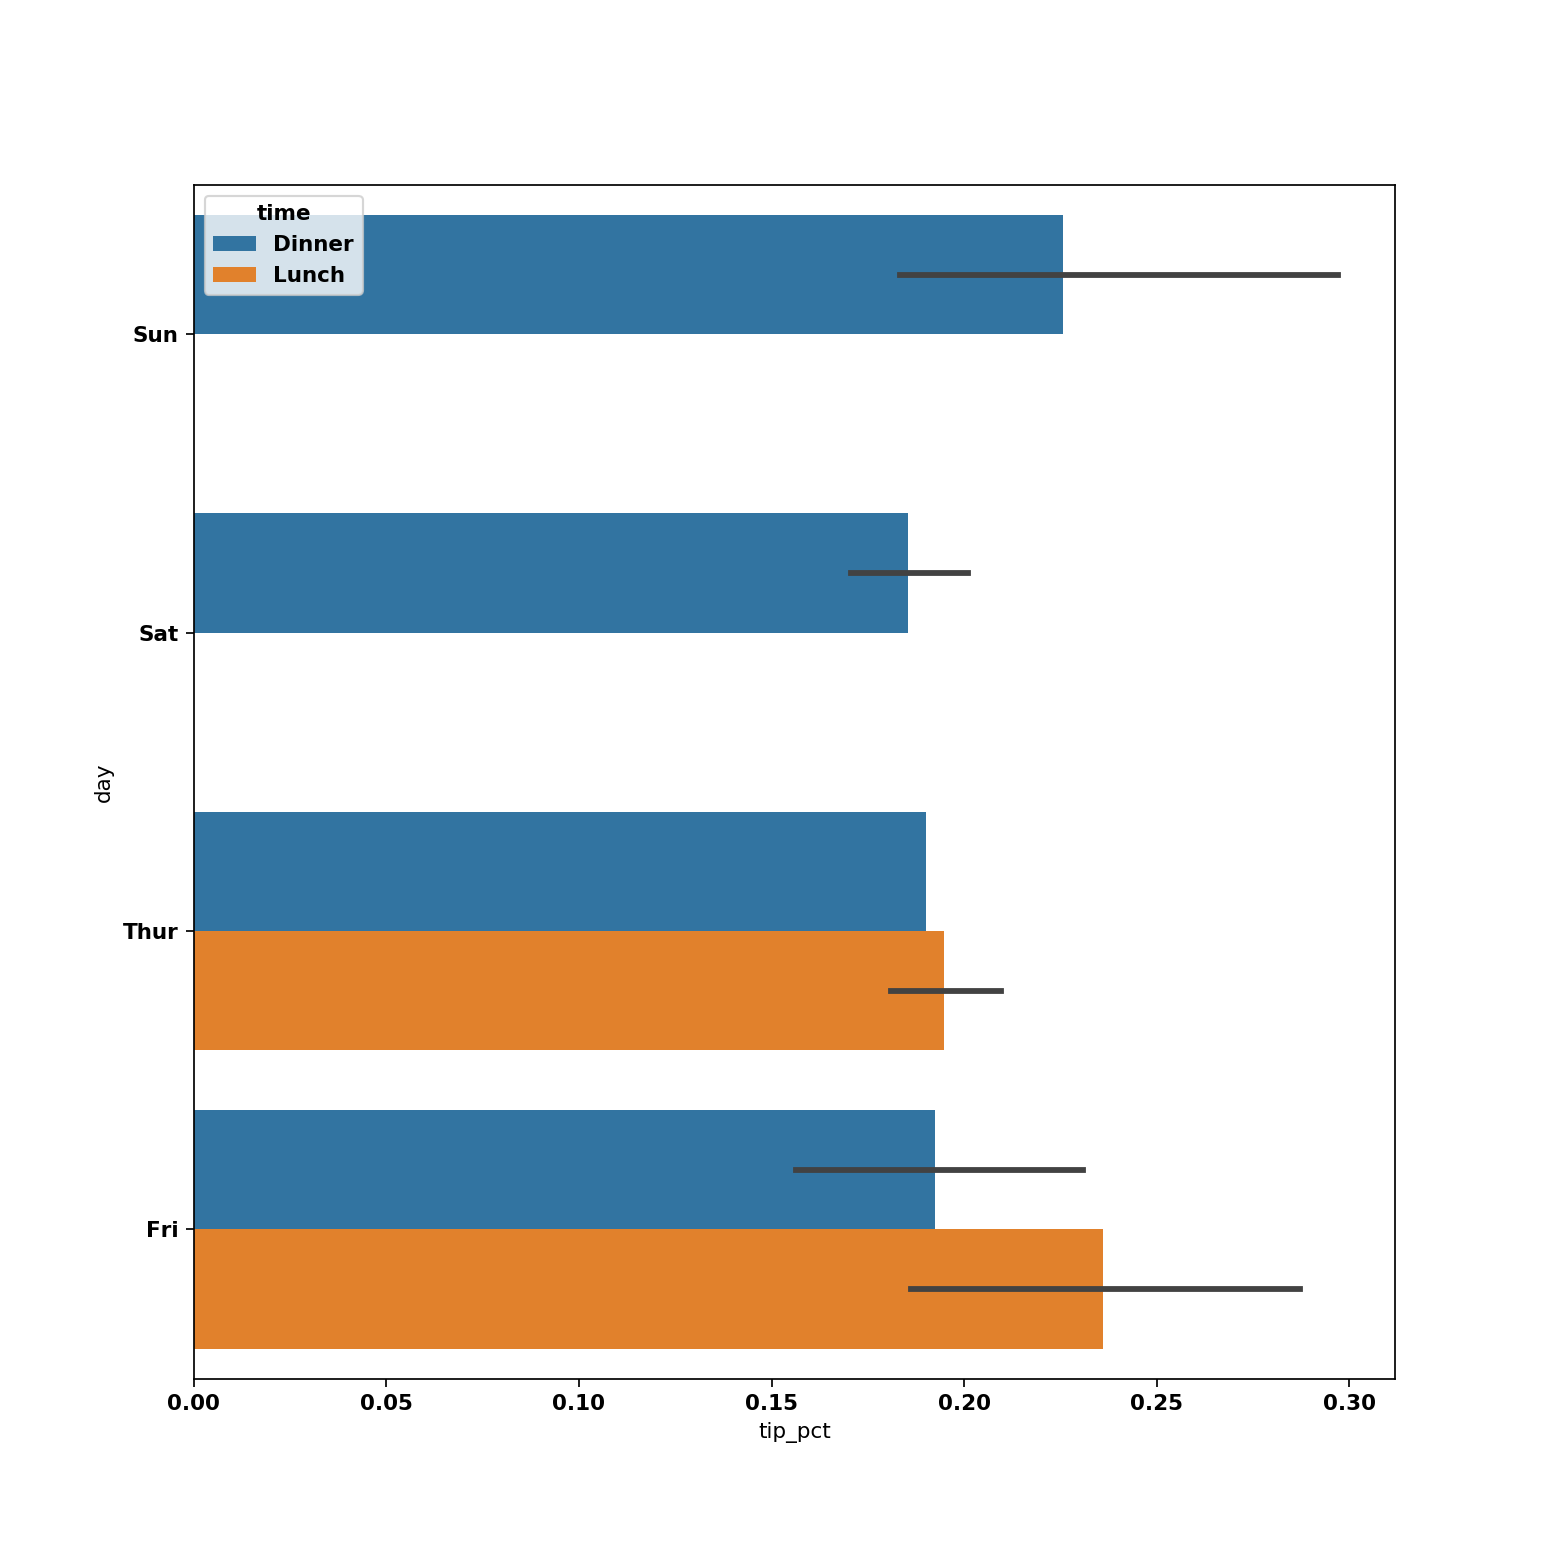

In [79]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [80]:
plt.close('all')

In [81]:
sns.set(style="whitegrid")

### 直⽅图和密度图 Histograms and Density Plots

<IPython.core.display.Javascript object>


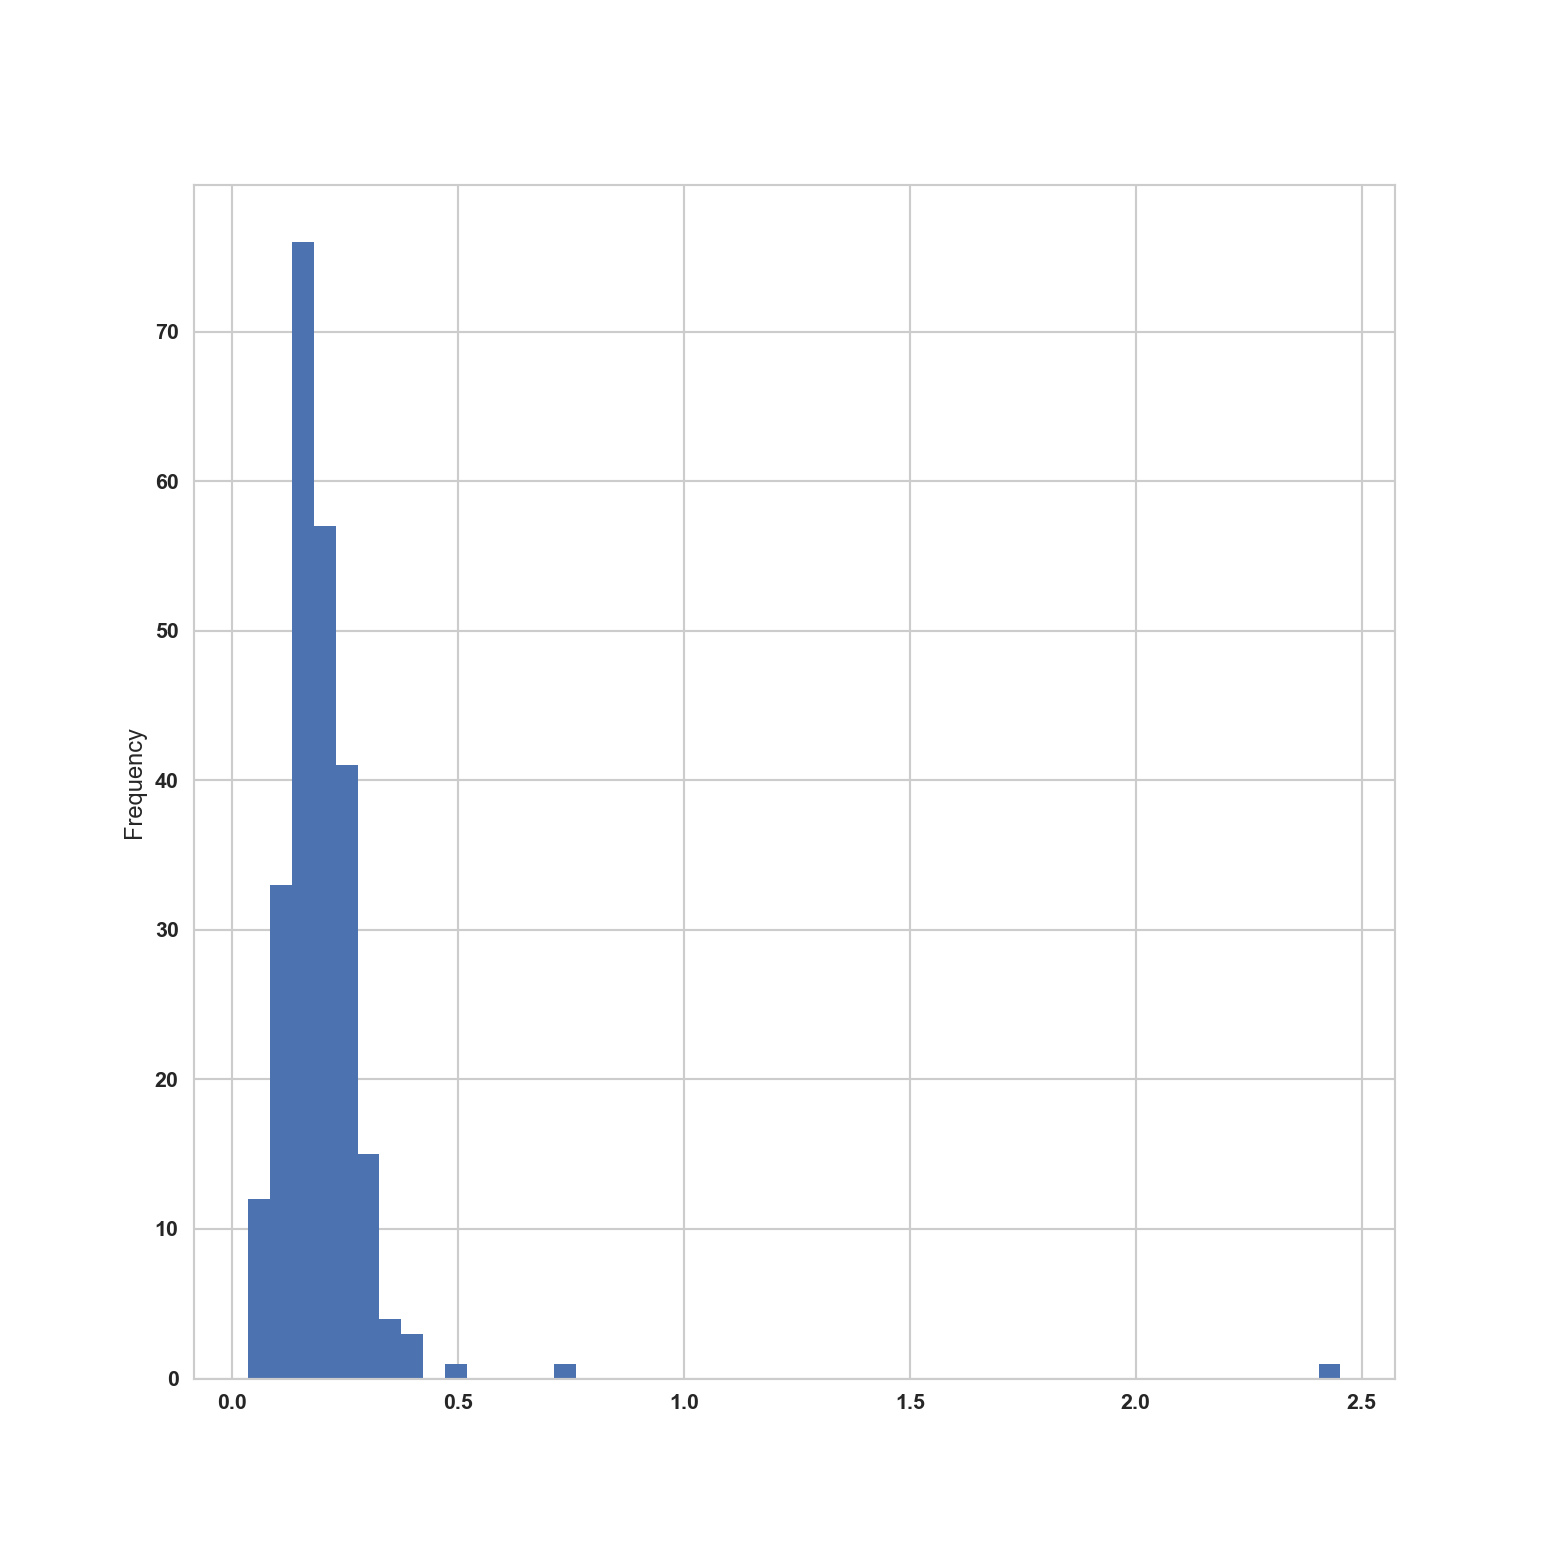

<IPython.core.display.Javascript object>


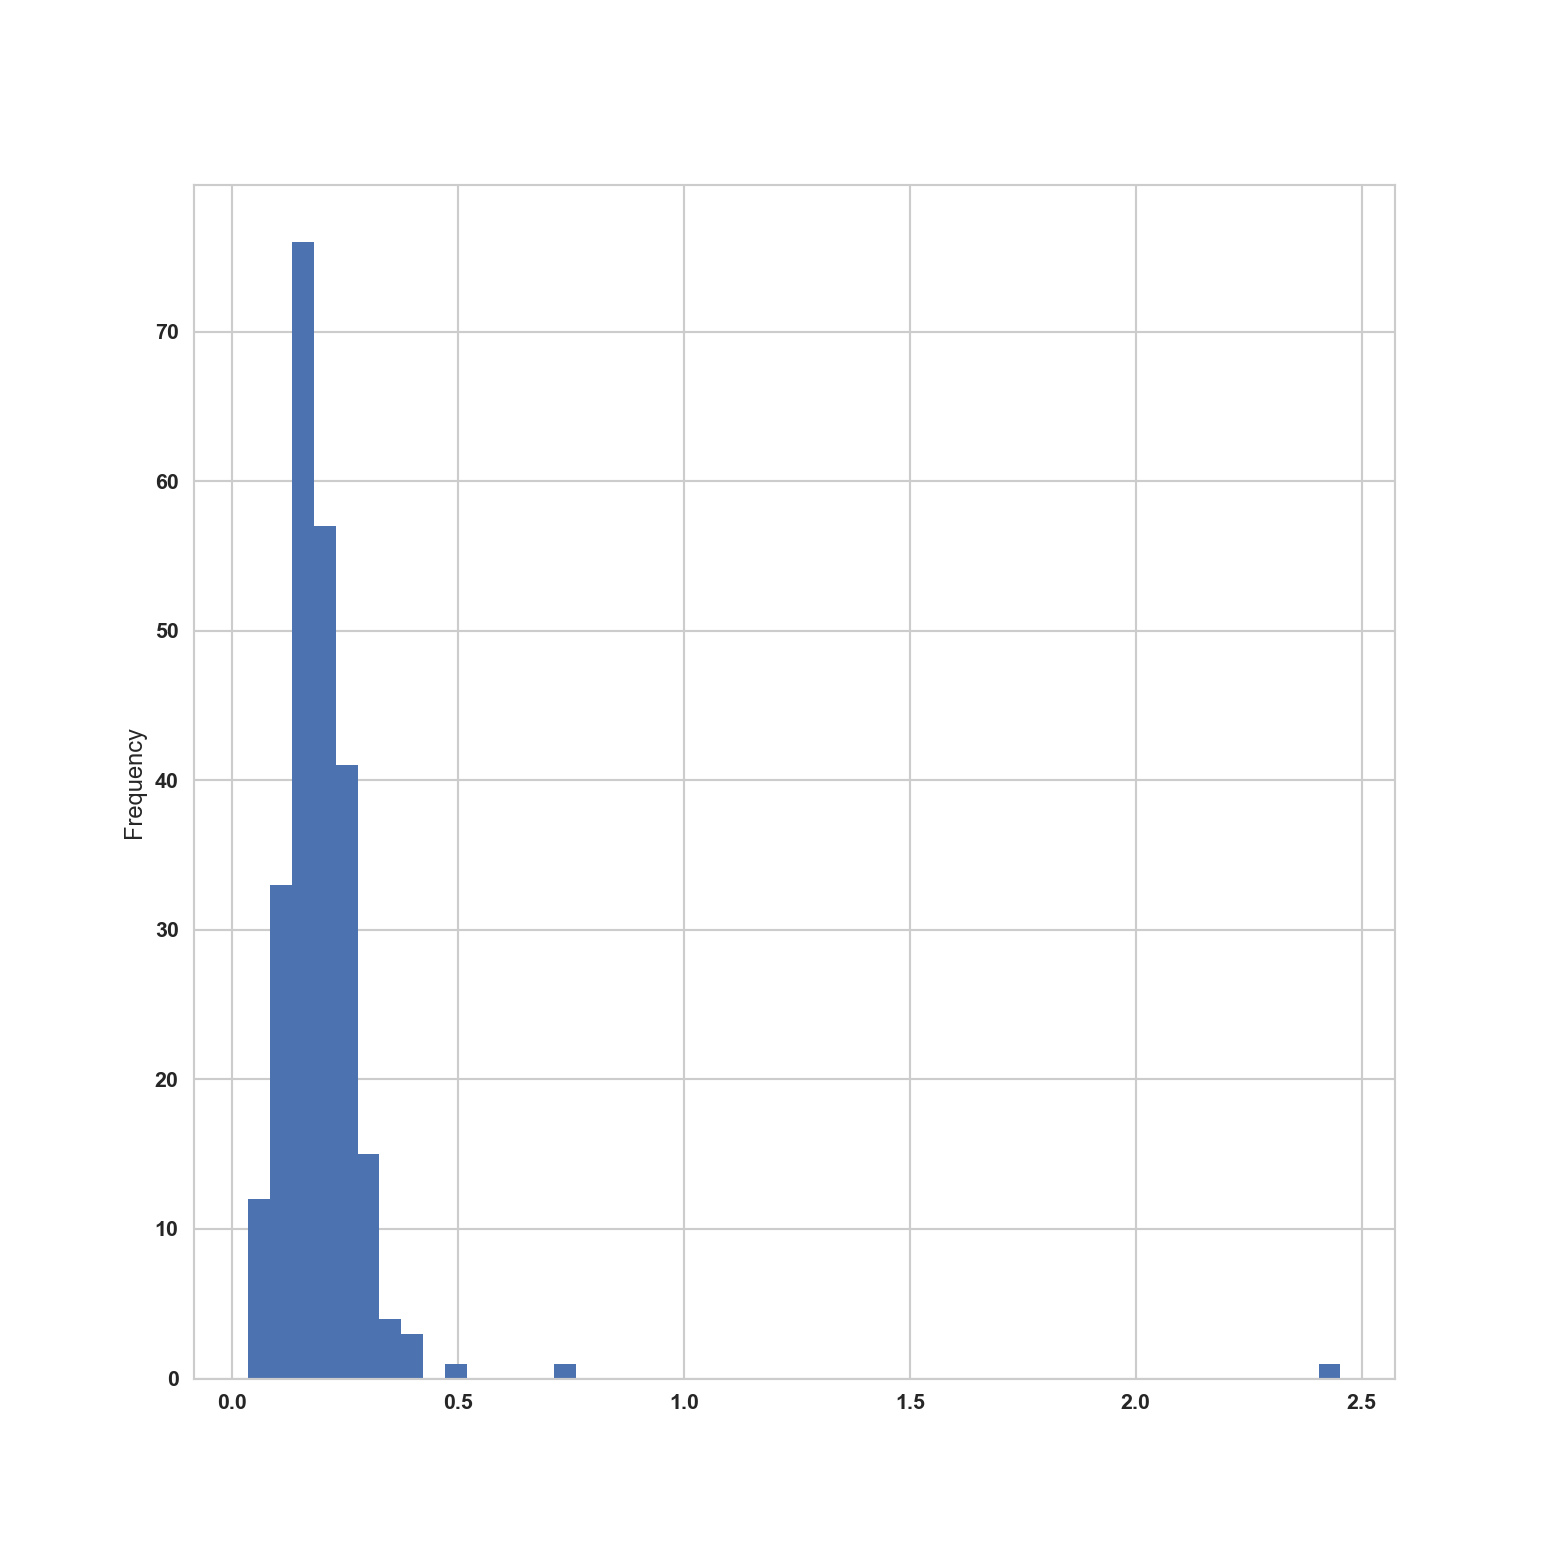

In [82]:
plt.figure()

In [83]:
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


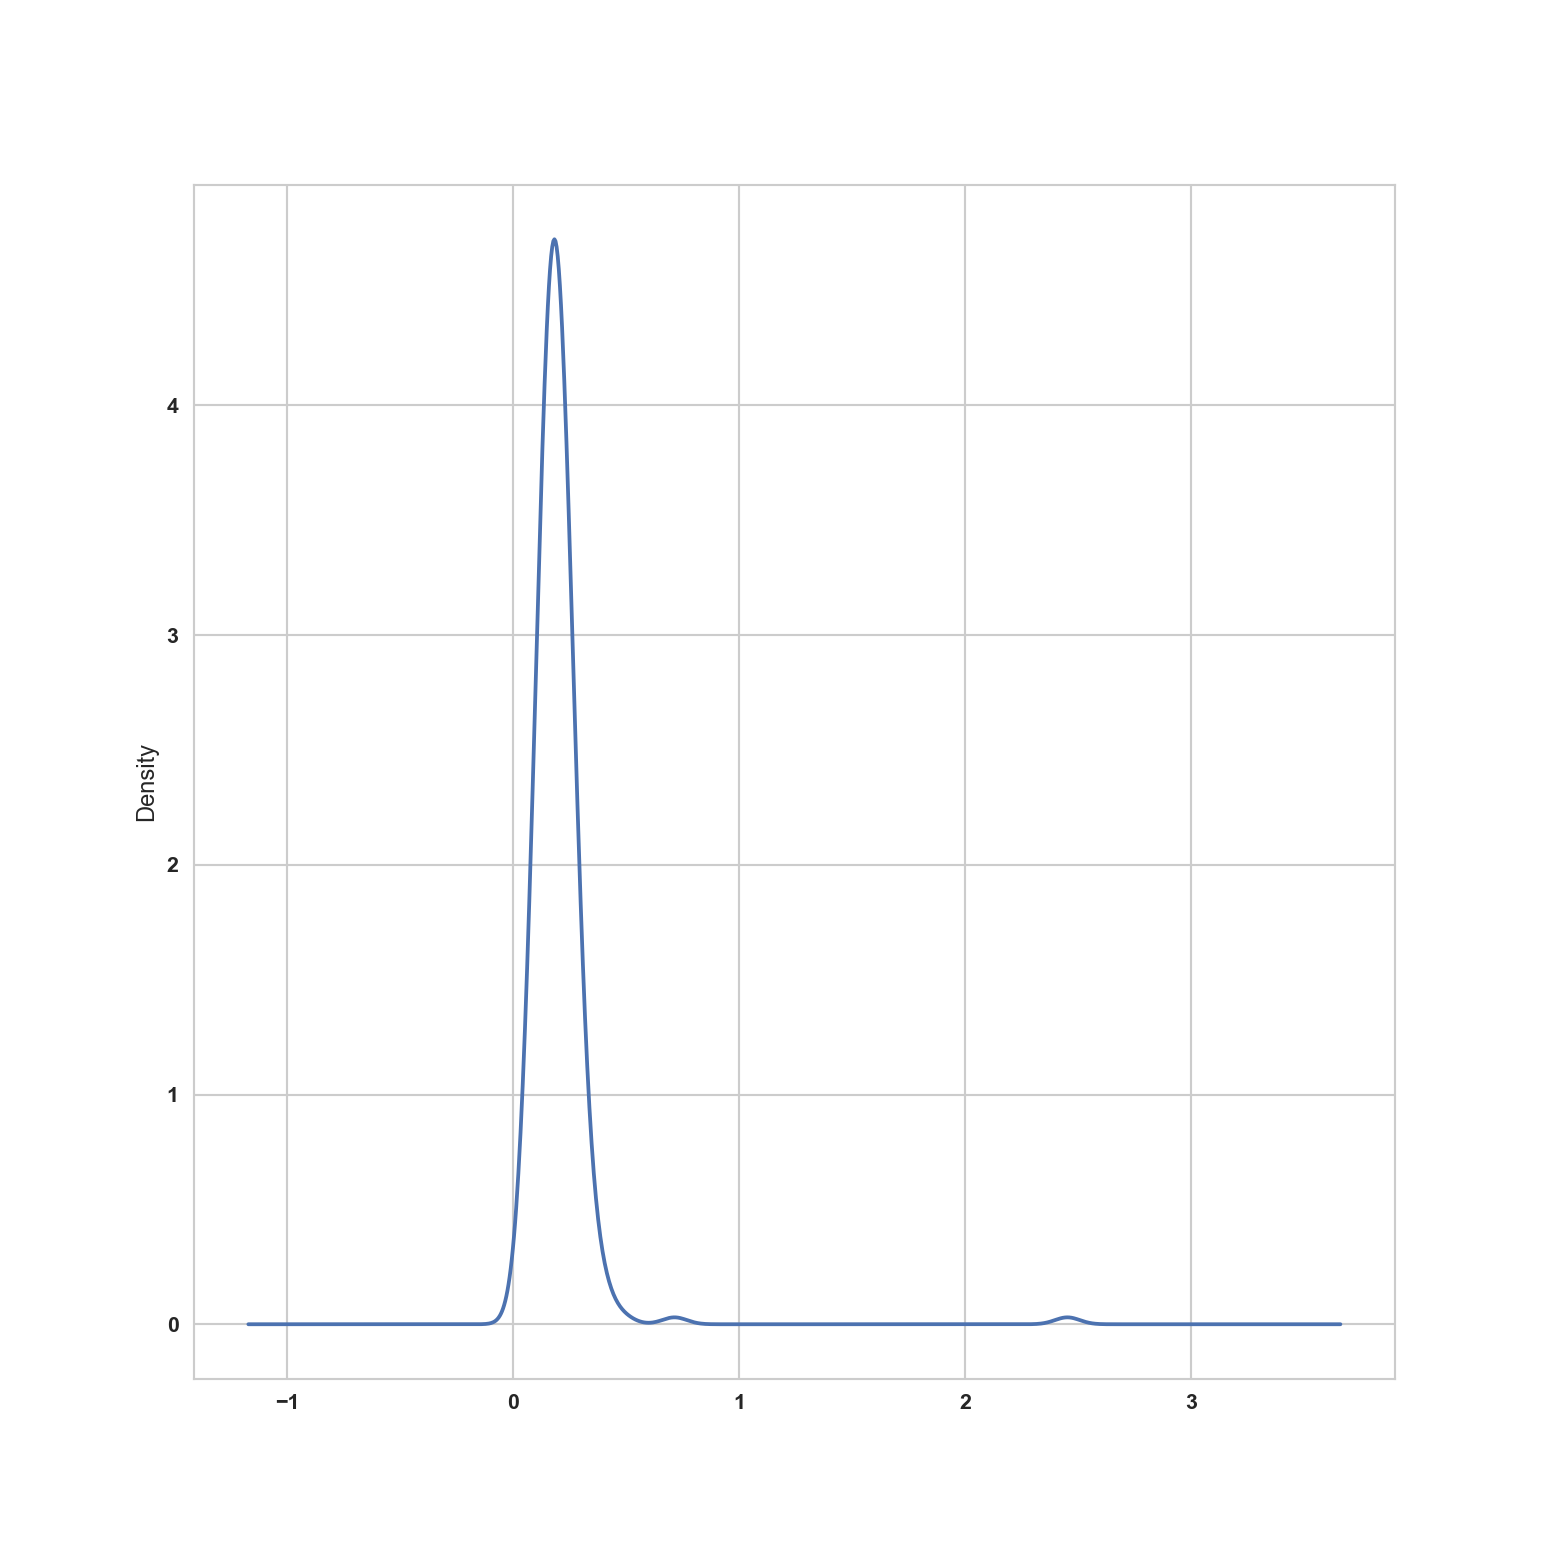

<IPython.core.display.Javascript object>


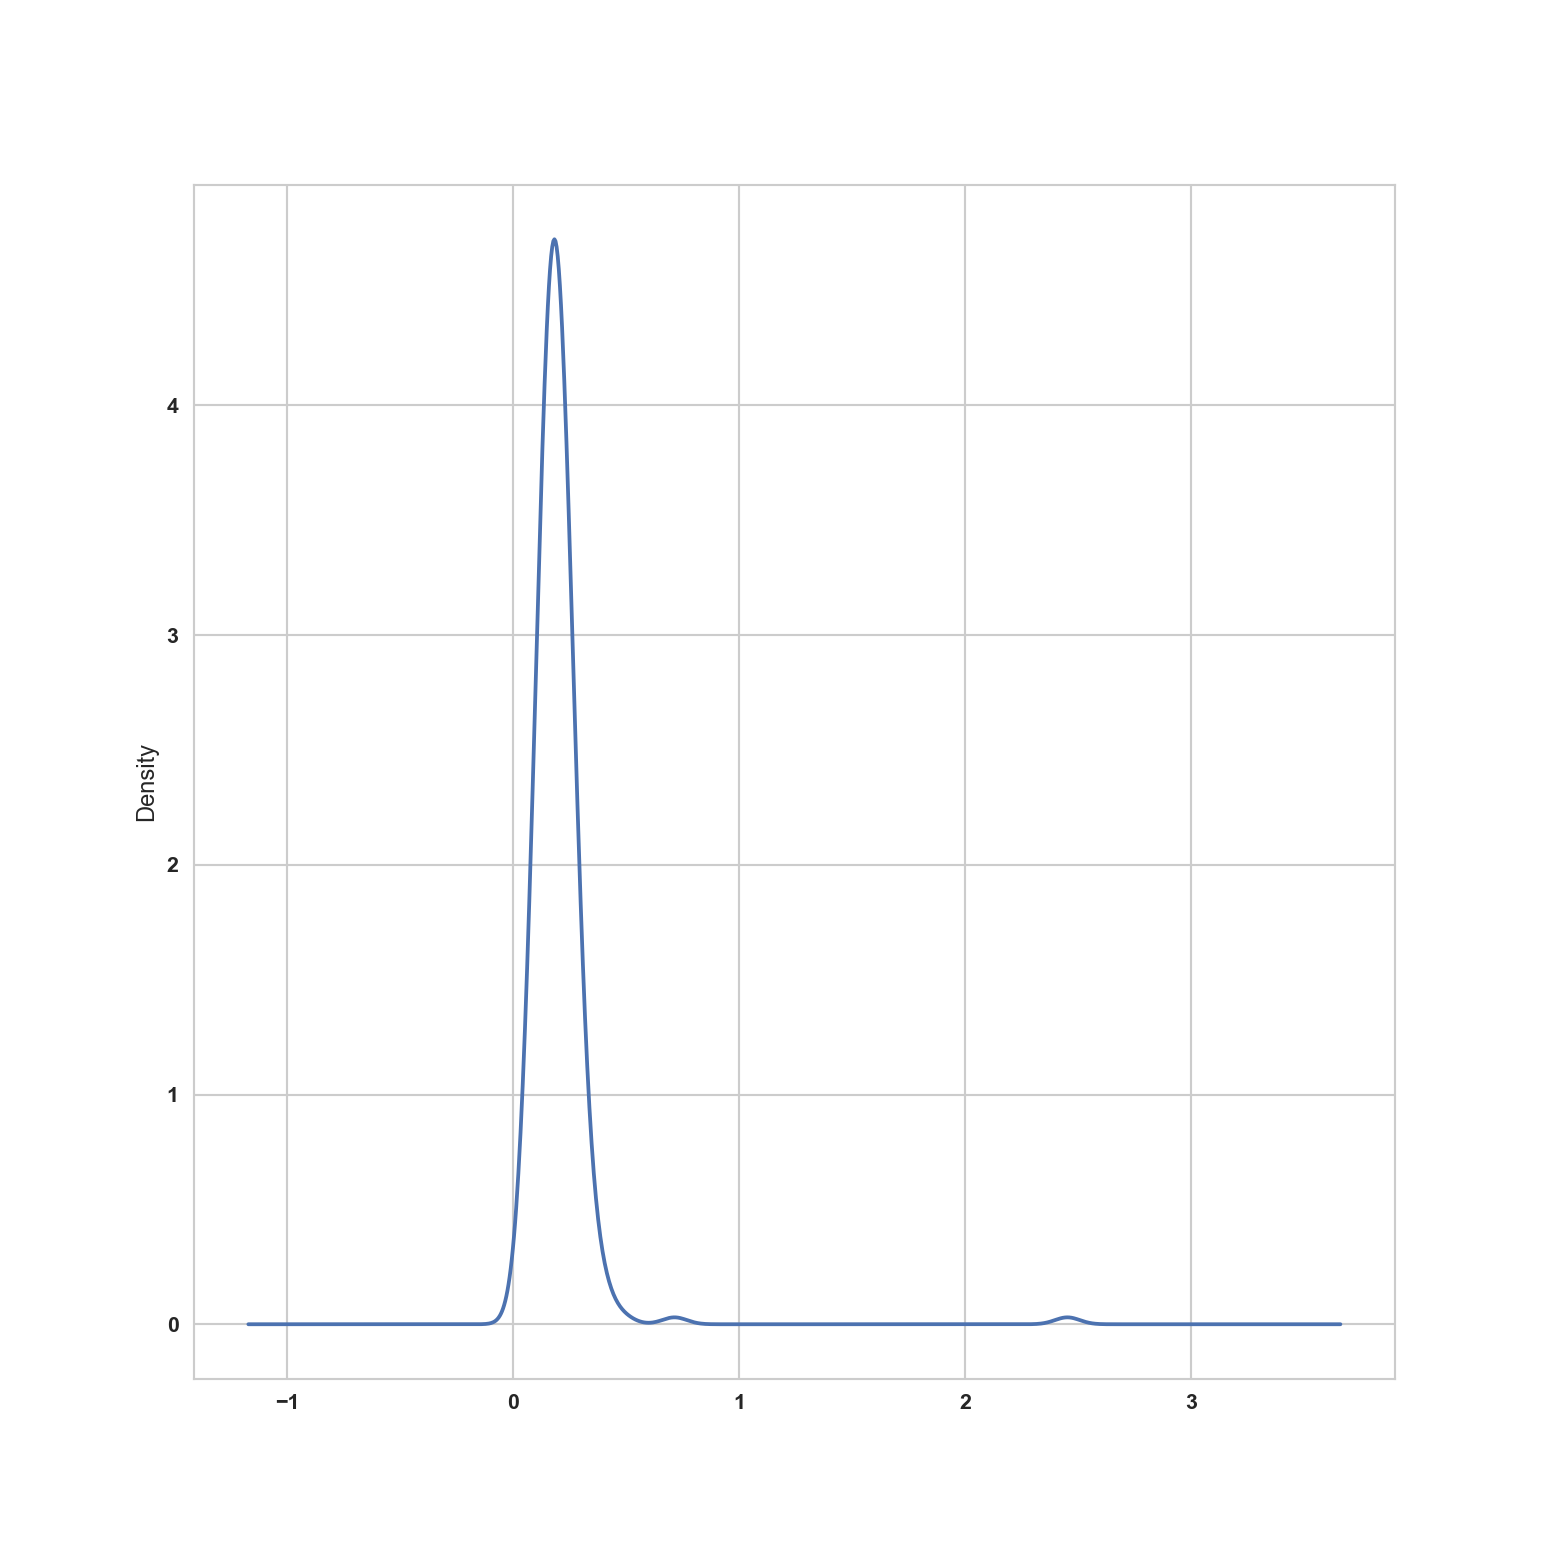

In [84]:
plt.figure()

In [85]:
tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


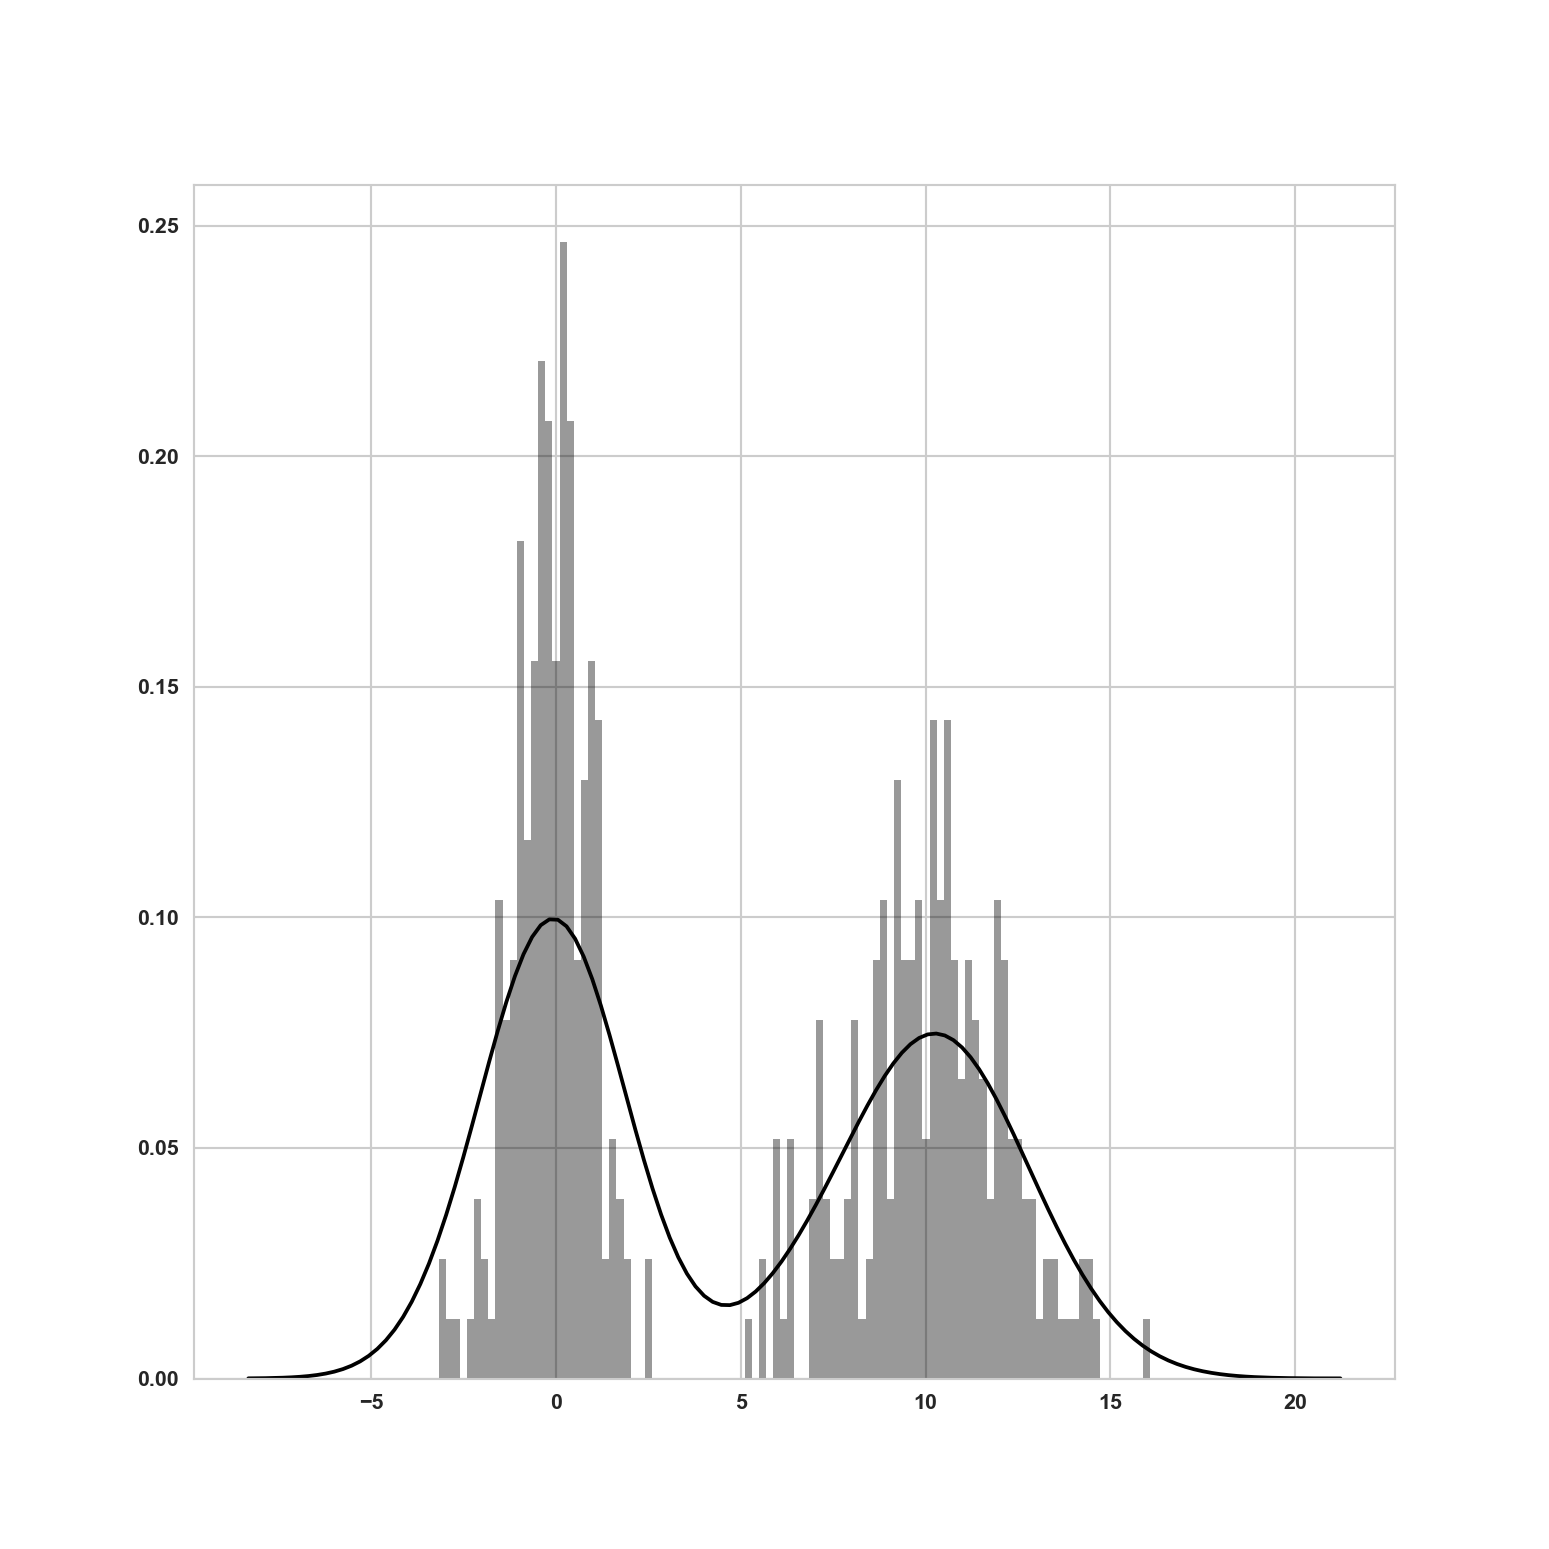

<IPython.core.display.Javascript object>


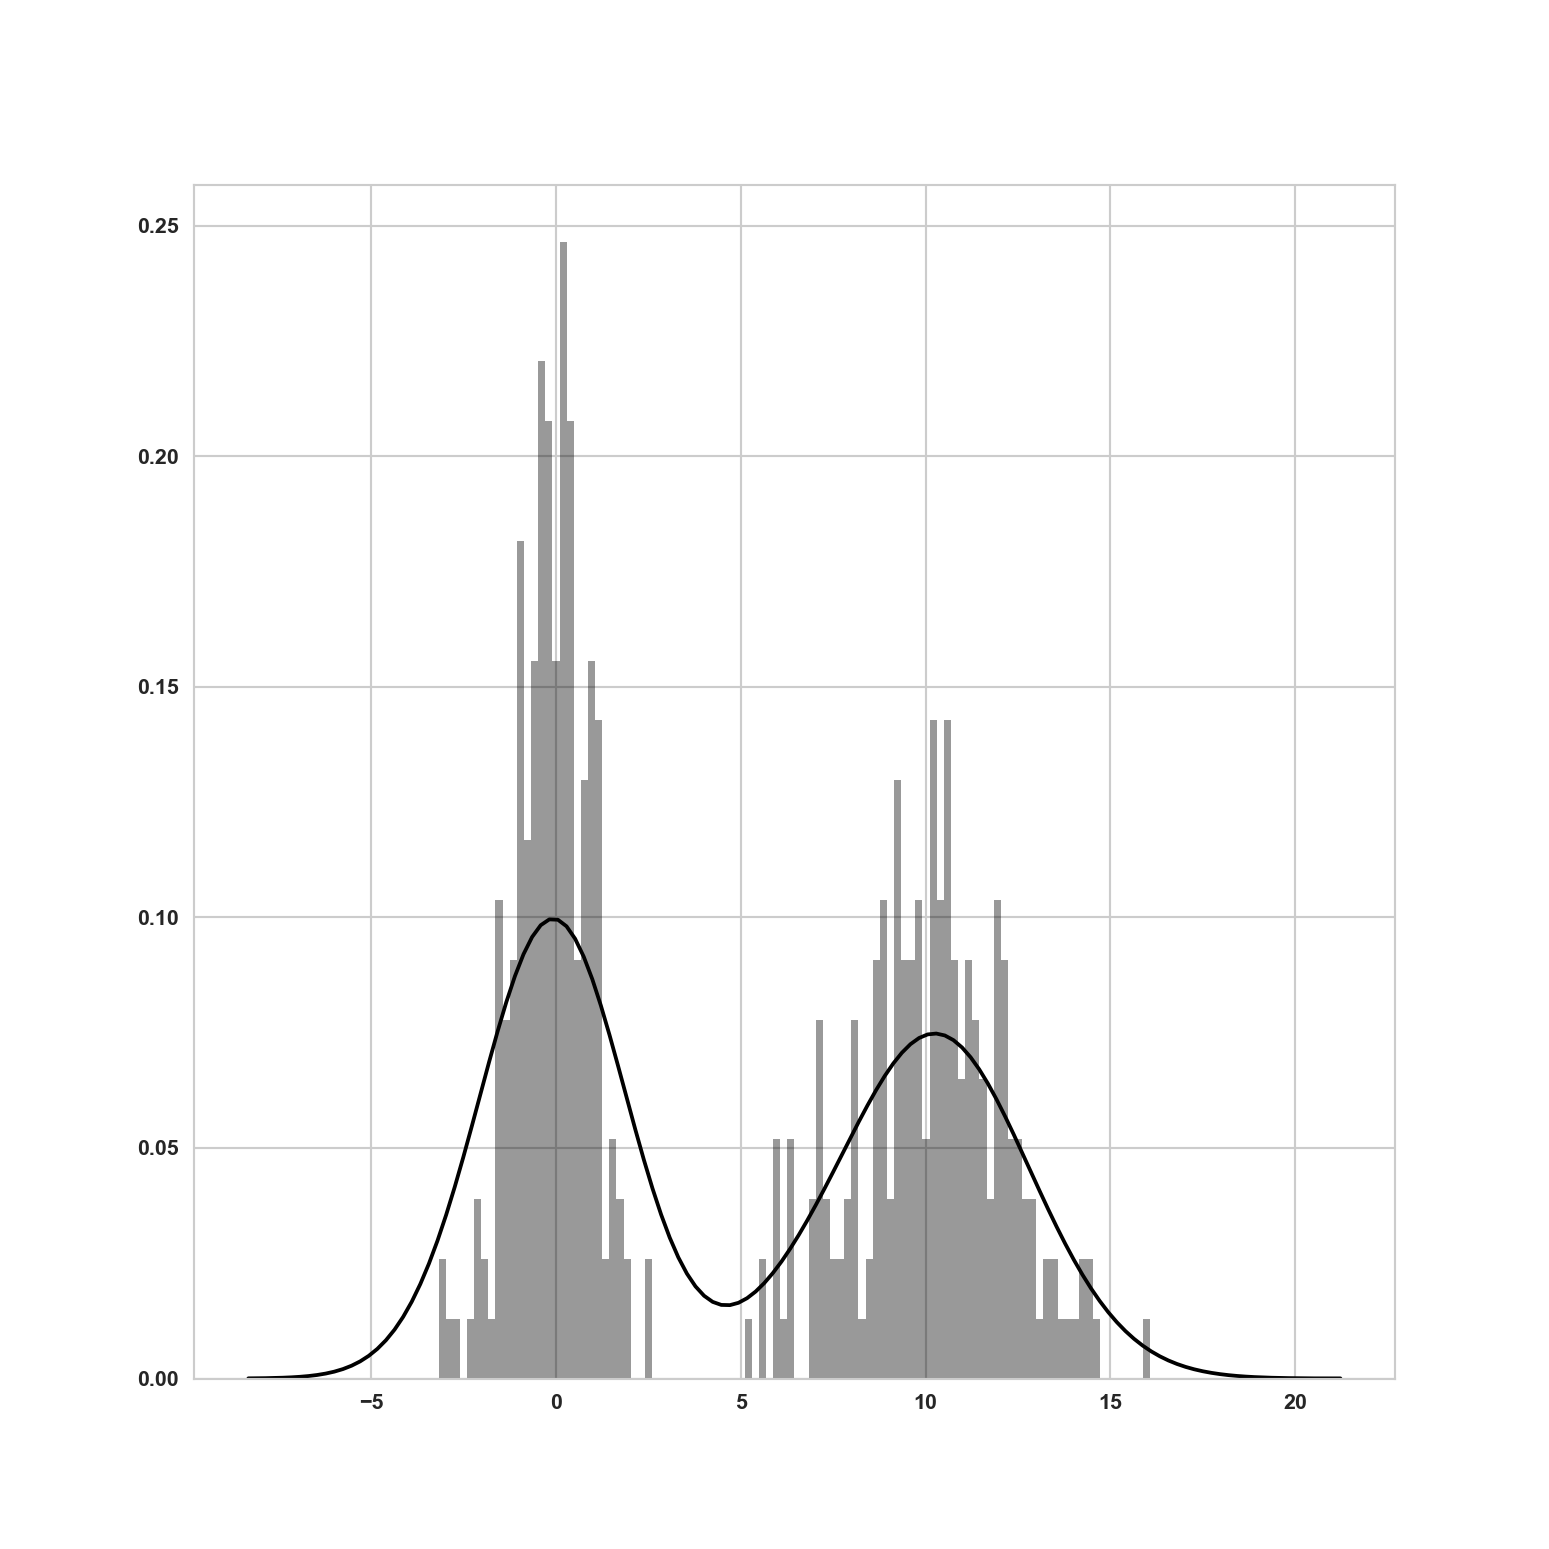

In [86]:
plt.figure()

In [87]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

c:\users\xiaomi\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


### 散布图或点图Scatter or Point Plots

In [89]:
macro = pd.read_csv('G:/test/pydata-book/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


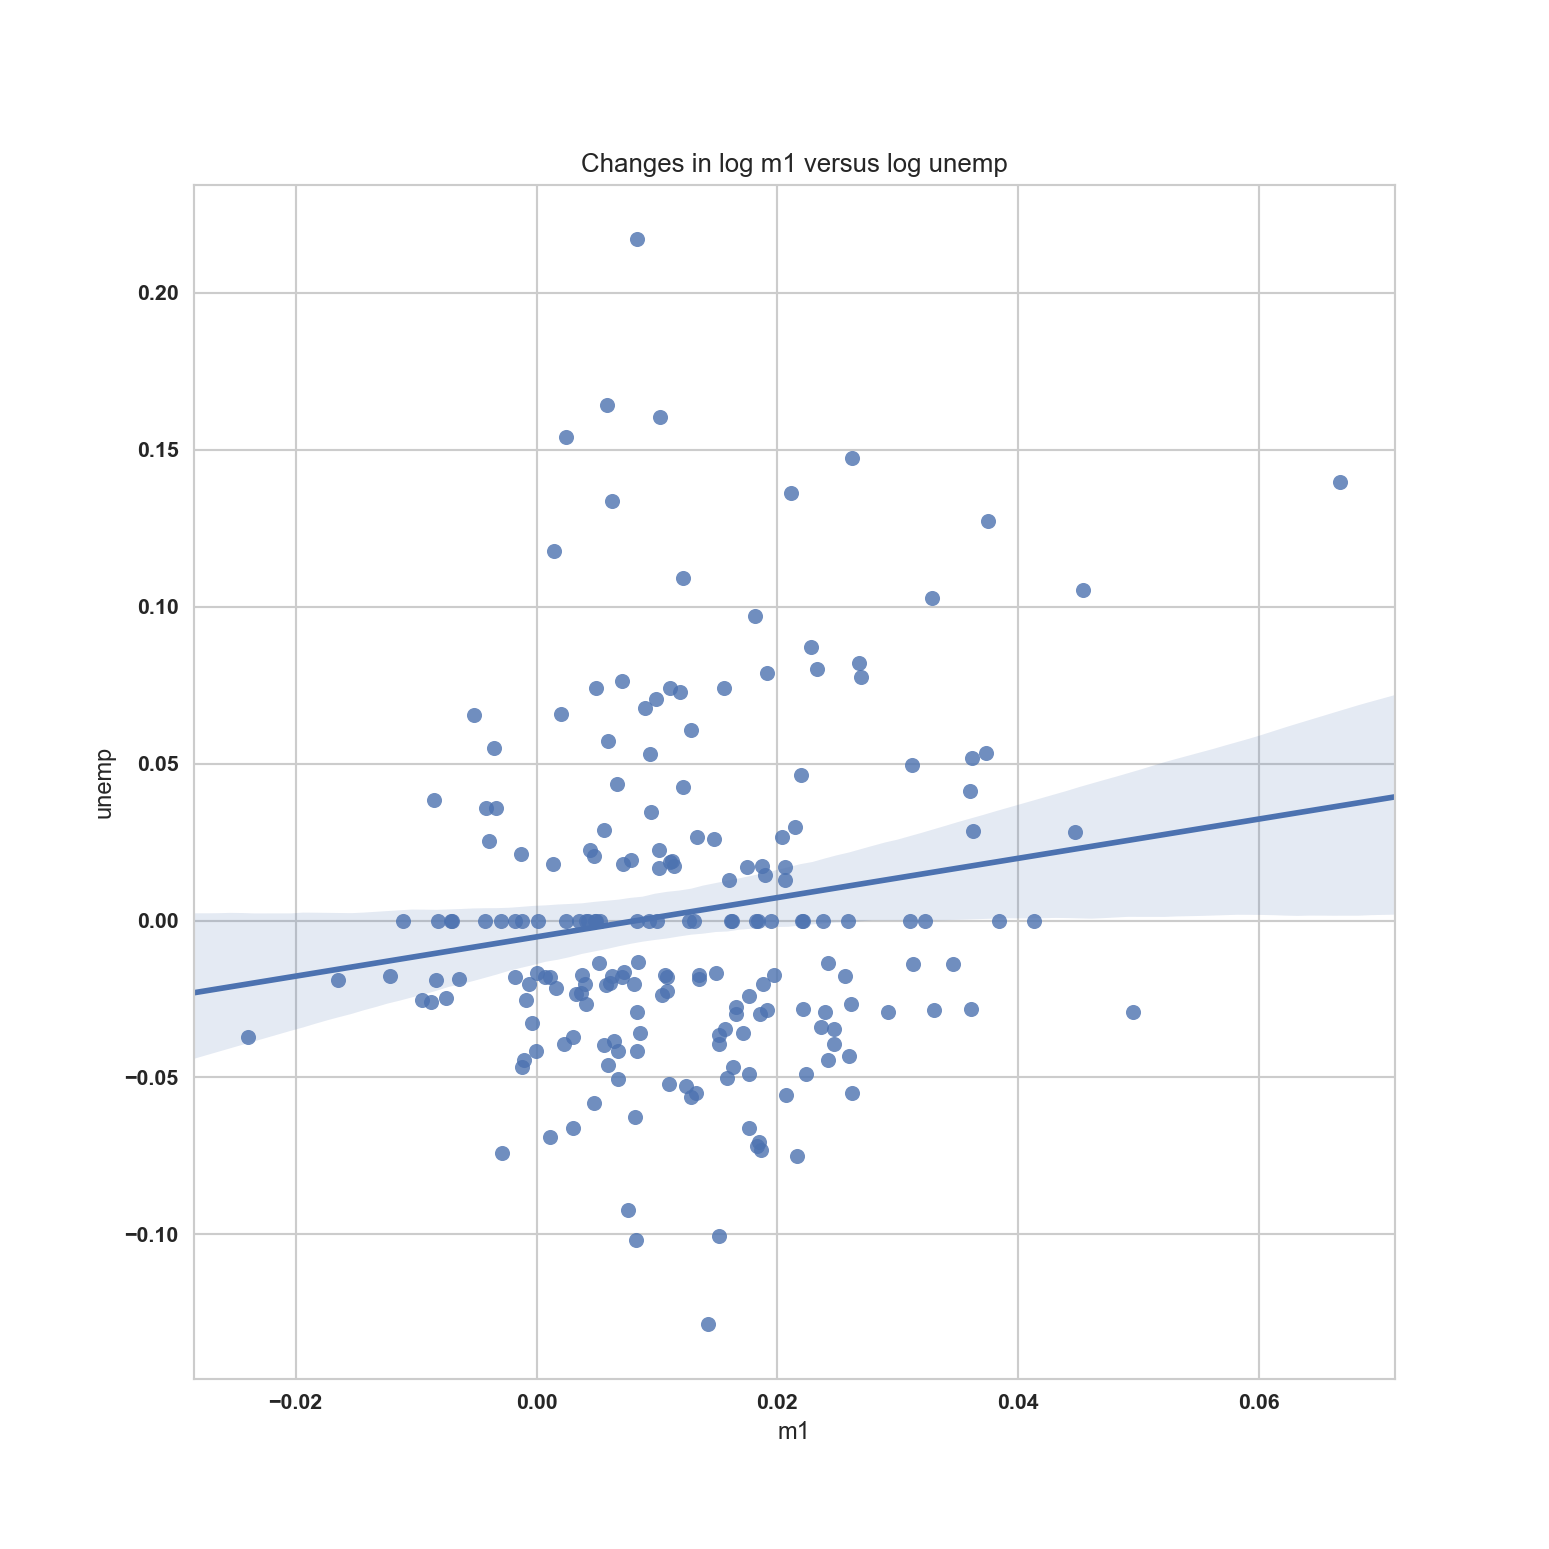

<IPython.core.display.Javascript object>


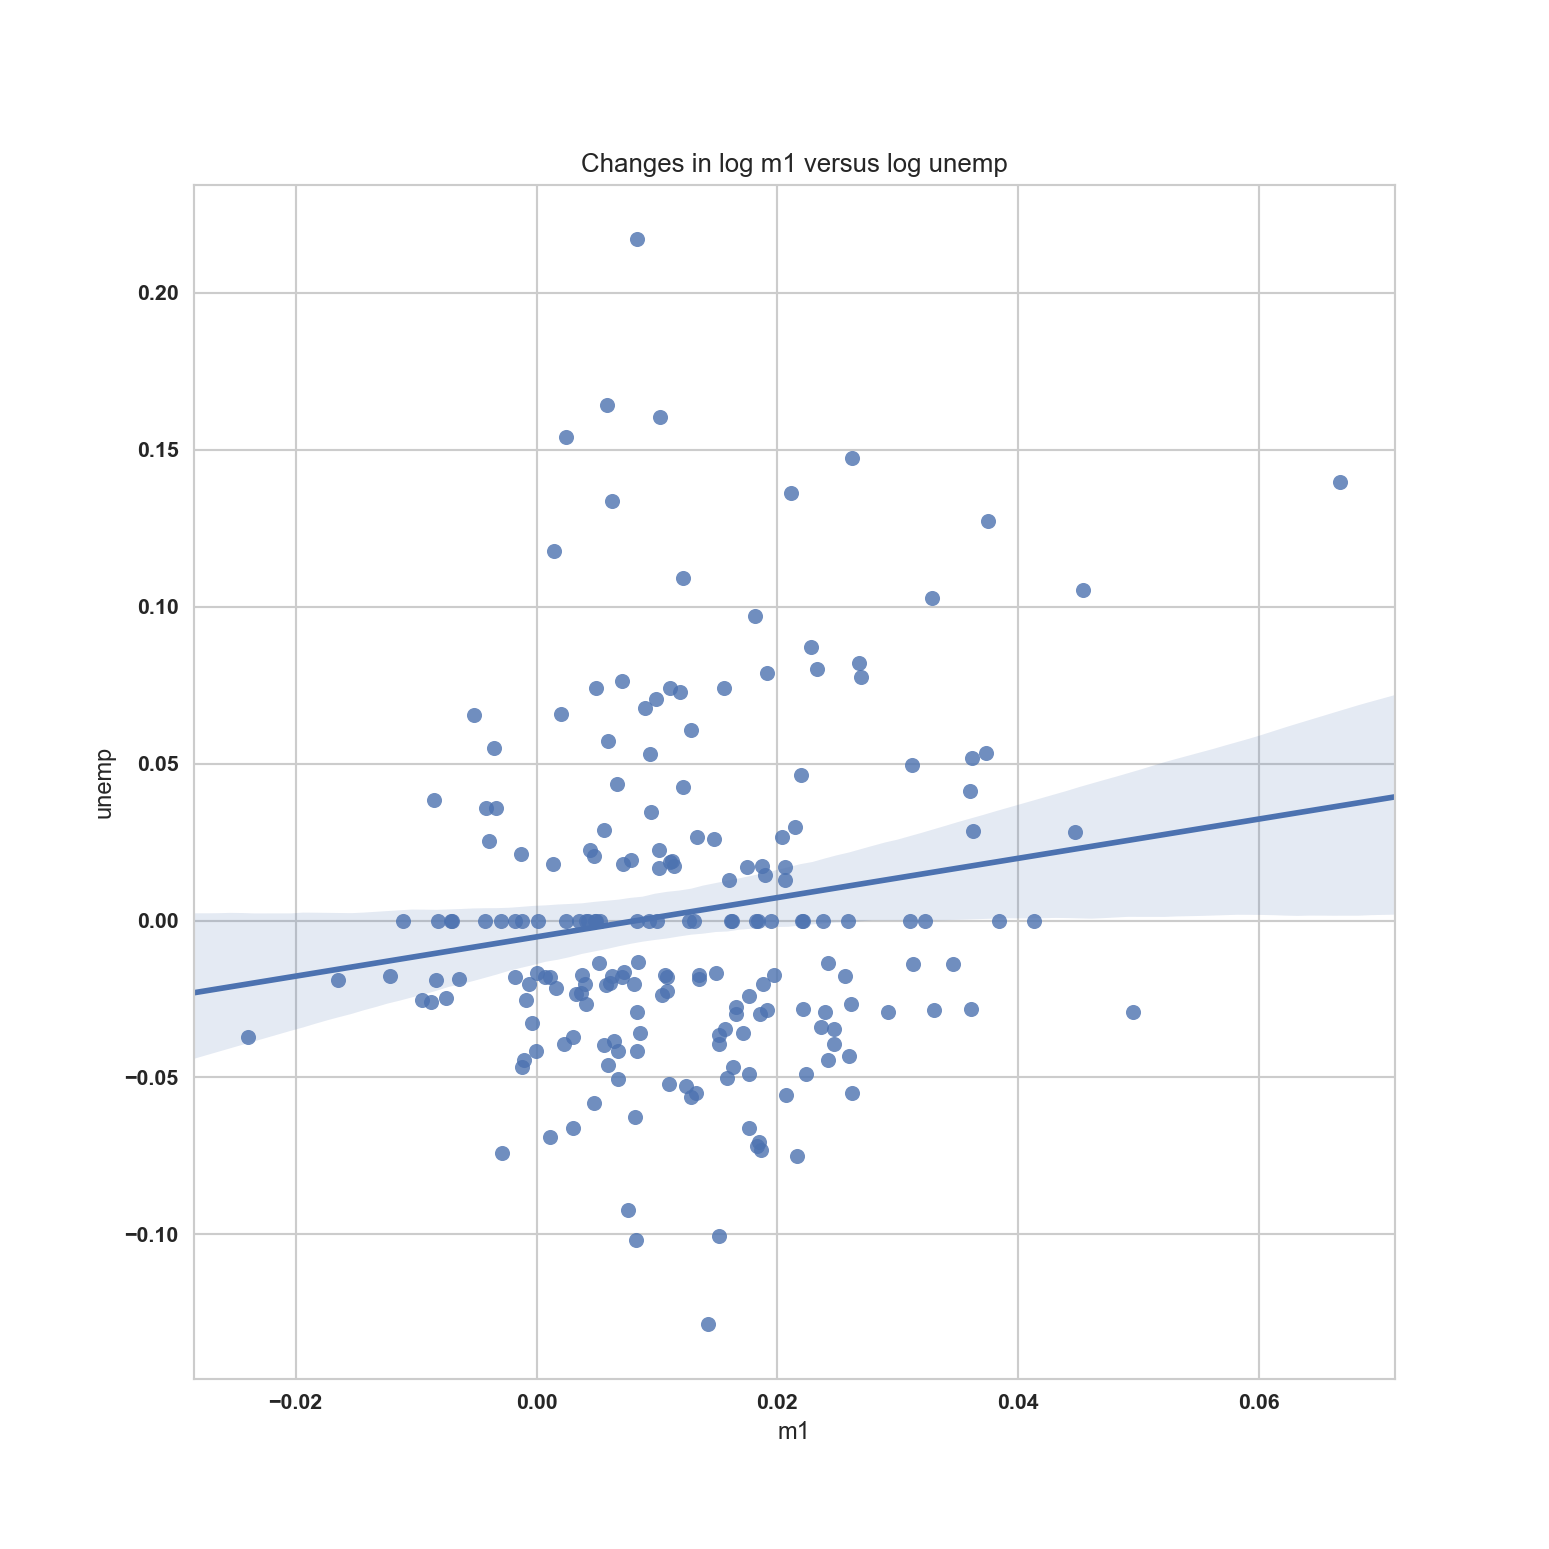

In [90]:
plt.figure()

In [91]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5,1,'Changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


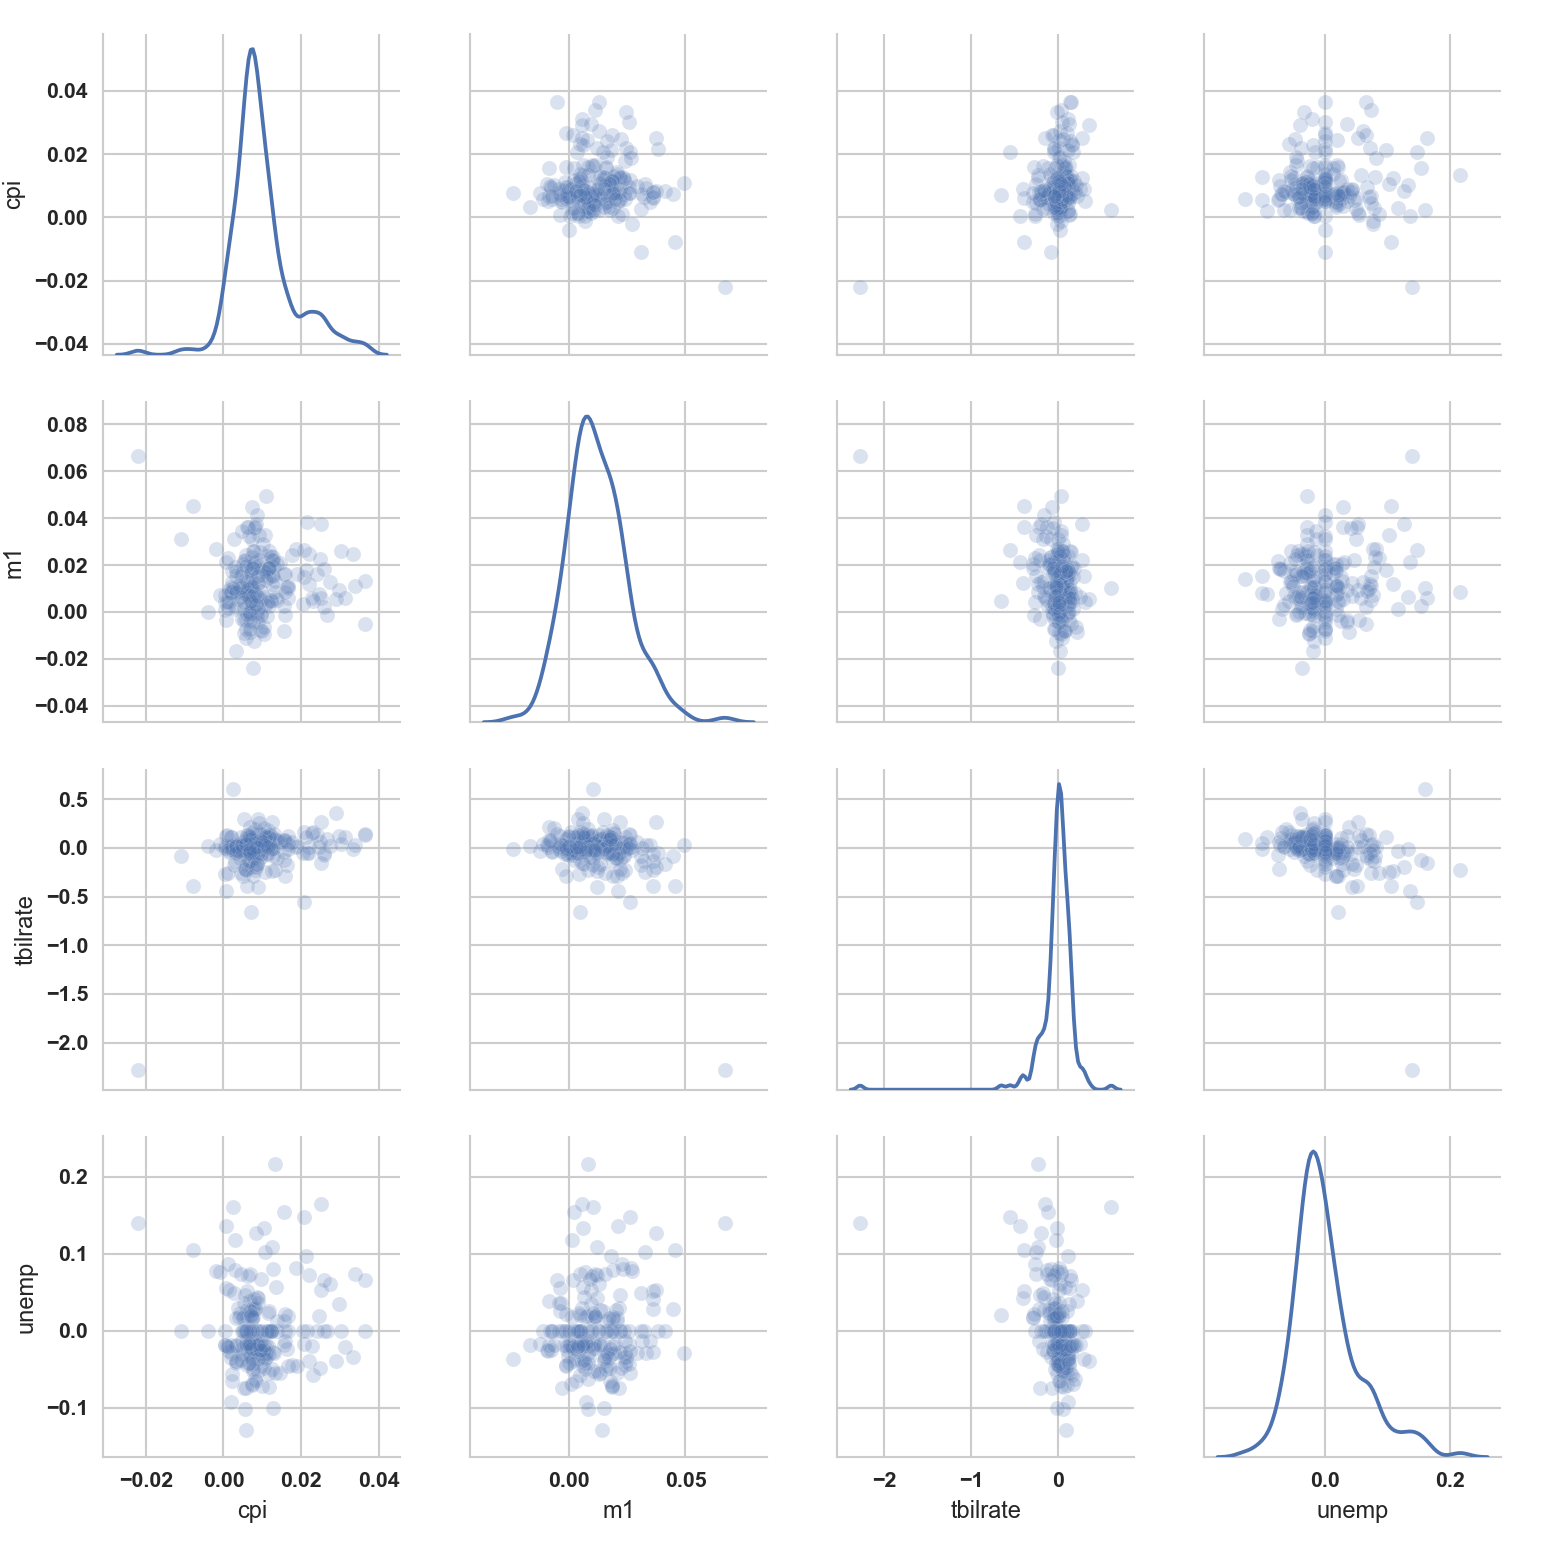

In [92]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 分⾯⽹格（facet grid）和类型数据Facet Grids and Categorical Data

<IPython.core.display.Javascript object>


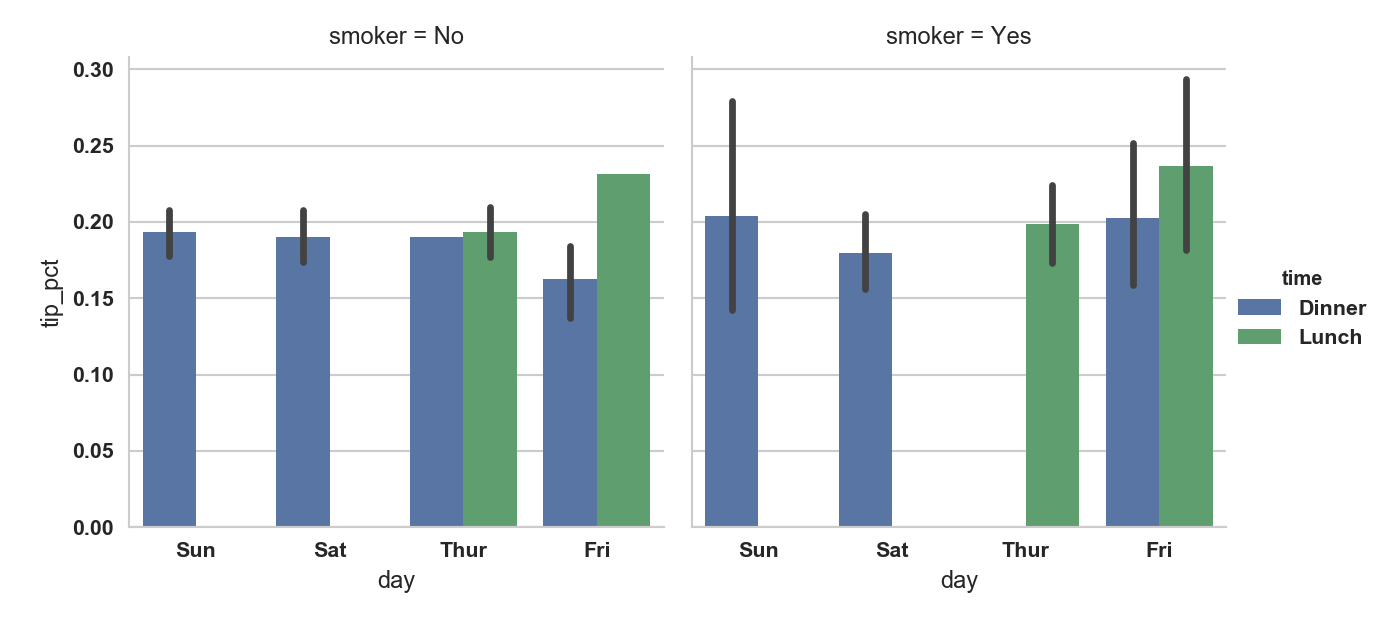

In [93]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


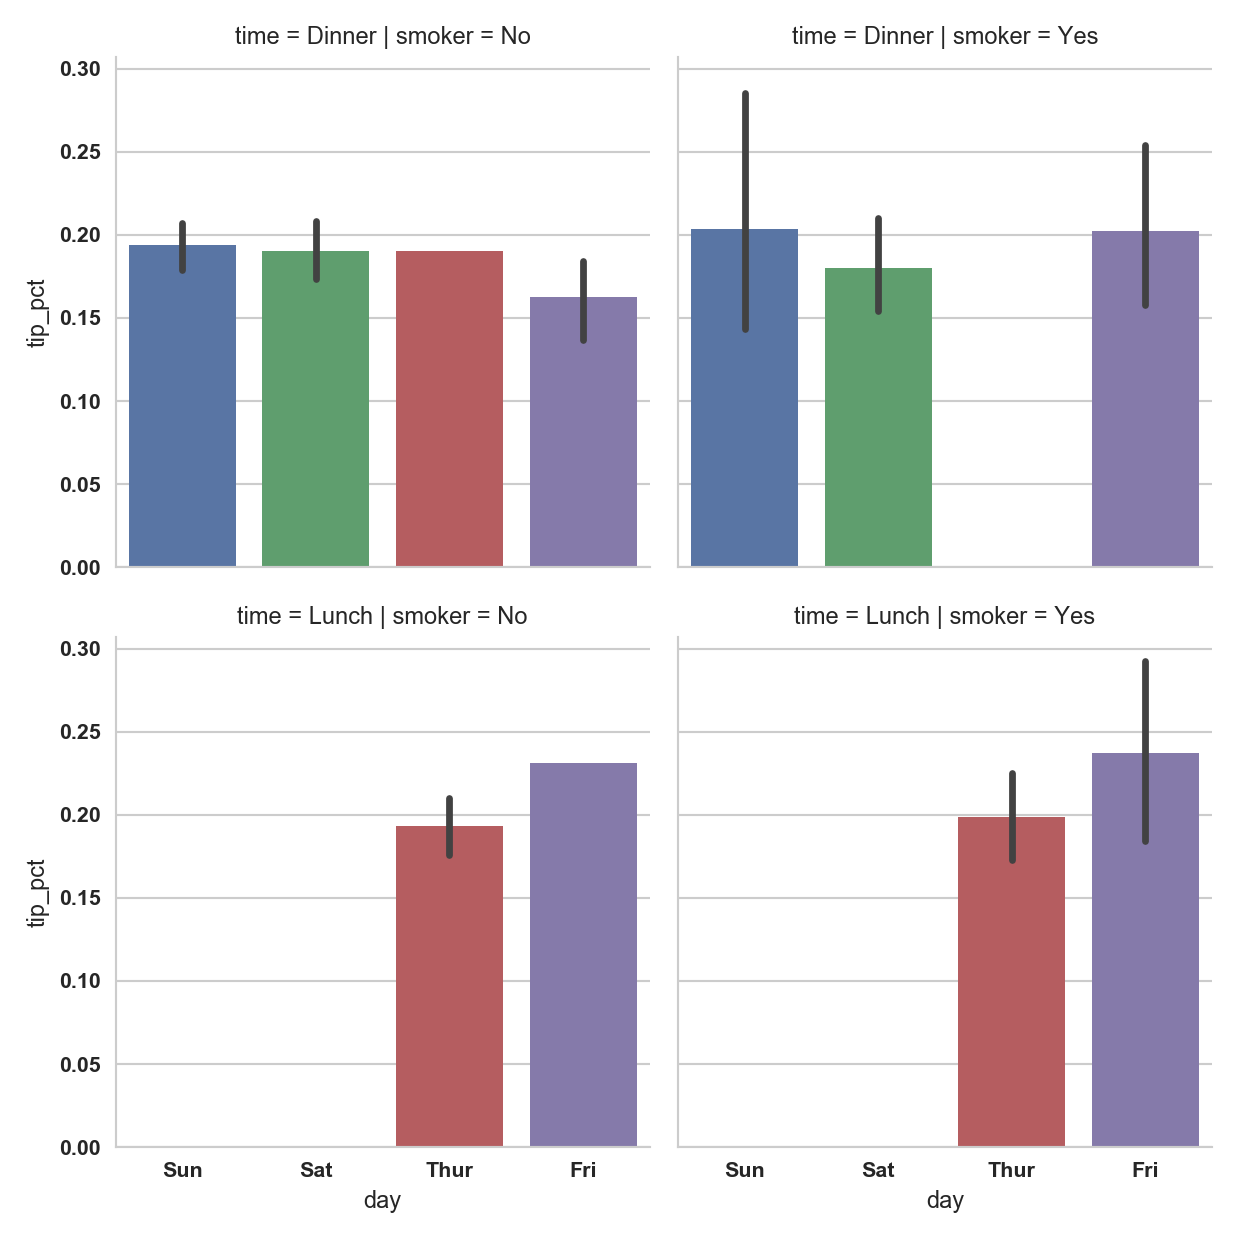

In [94]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


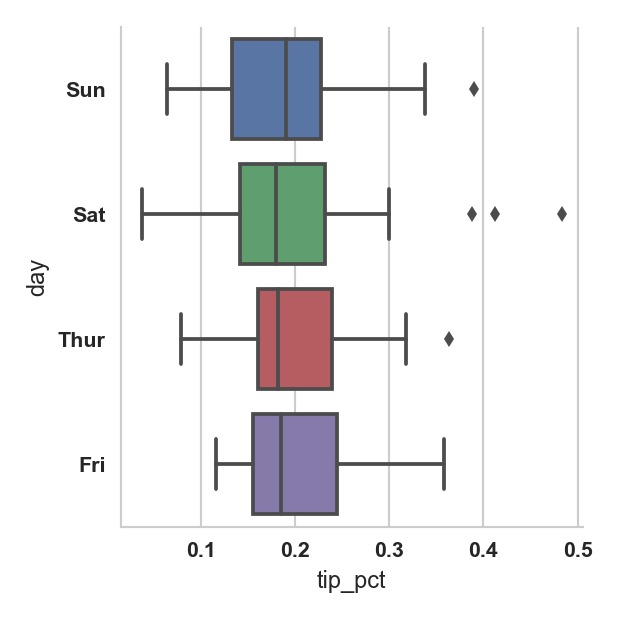

In [95]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## 9.3 其它的Python可视化⼯具Other Python Visualization Tools

与其它开源库类似， Python创建图形的⽅式⾮常多（根本罗列不
完）。⾃从2010年，许多开发⼯作都集中在创建交互式图形以便
在Web上发布。利⽤⼯具如
Boken（https://bokeh.pydata.org/en/latest/）和
Plotly（https://github.com/plotly/plotly.py），现在可以创建动态
交互图形，⽤于⽹⻚浏览器。
对于创建⽤于打印或⽹⻚的静态图形，我建议默认使⽤
matplotlib和附加的库，⽐如pandas和seaborn。对于其它数据可
视化要求，学习其它的可⽤⼯具可能是有⽤的。我⿎励你探索绘
图的⽣态系统，因为它将持续发展。

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## 9.4 总结Conclusion

本章的⽬的是熟悉⼀些基本的数据可视化操作，使⽤pandas，
matplotlib，和seaborn。如果视觉显示数据分析的结果对你的⼯
作很重要，我⿎励你寻求更多的资源来了解更⾼效的数据可视
化。这是⼀个活跃的研究领域，你可以通过在线和纸质的形式学
习许多优秀的资源。
下⼀章，我们将重点放在pandas的数据聚合和分组操作上。